In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

%matplotlib inline

In [2]:
from plotly import __version__
cf.go_offline()

In [3]:
print(__version__)

2.7.0


In [4]:
df = pd.read_csv('../dataset/all/application_train.csv')
df_prevs=pd.read_csv('../dataset/all/previous_application.csv')

In [148]:
df_test_df = pd.read_csv('../dataset/all/application_test.csv') 

In [6]:
df.head(45)
df.shape

(307511, 122)

In [7]:
len(df.columns)

122

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

                  ...              FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
count             ...                 307511.000000     307511.000000   
mean              ...                      0.008130          0.000595   
std               ...                      0.089798          0.024387   
min               ...                      0.000000          0.000000   
25%               ...                      0.000000          0.000000   
50%               ...                      0.000000          0.000000   
75%               ...                      0.000000          0.000000   
max               ...                      1.000000          1.000000   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000     307511.000000               265992.000000   
mean           0.000507          0.000335                    0.006402   
std            0.022518          0.018299                    0.083849   
min            0.000000          0.000000                    0.000000   
25%            0.000000          0.000000                    0.000000   
50%            0.000000          0.000000                    0.000000   
75%            0.000000          0.000000                    0.000000   
max            1.000000          1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              265992.000000              265992.000000   
mean                    0.267395                   0.265474   
std                     0.916002                   0.794056   
min                     0.000000                   0.000000   
25%                     0.000000                   0.

# EDA

Text(0.5,0,'AMT_ANNUITY')

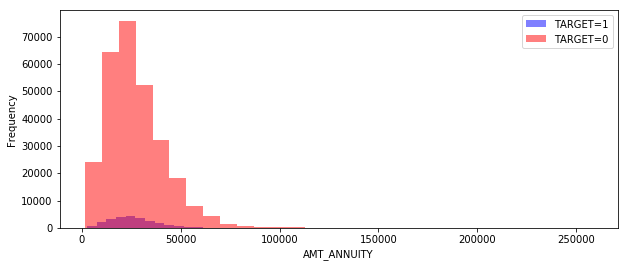

In [10]:
plt.figure(figsize=(10,4))
df[df['TARGET']==1]['AMT_ANNUITY'].plot.hist(alpha=0.5,color='blue',bins = 30,label='TARGET=1')
df[df['TARGET']==0]['AMT_ANNUITY'].plot.hist(alpha=0.5,color='red',bins = 30,label='TARGET=0')
plt.legend()
plt.xlabel('AMT_ANNUITY')

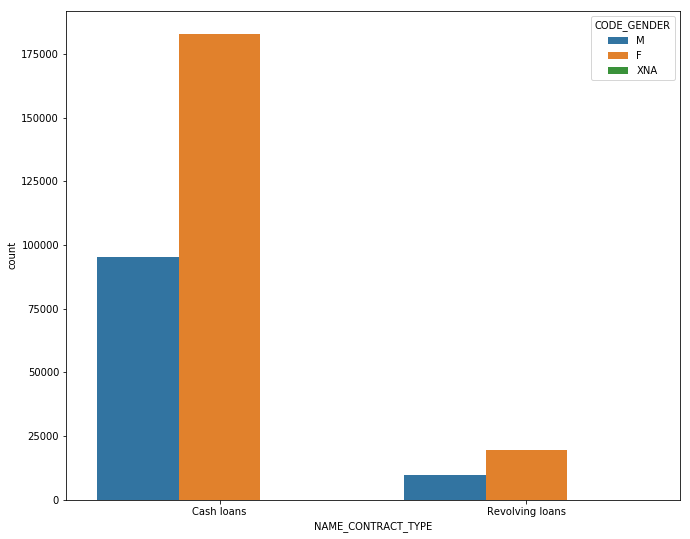

In [11]:
plt.figure(figsize=(11,9))
sns.countplot(x='NAME_CONTRACT_TYPE',hue='CODE_GENDER',data = df)

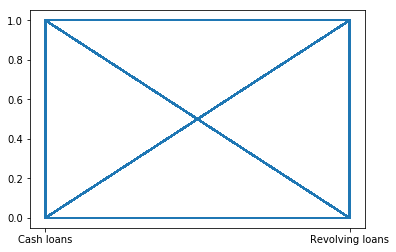

In [12]:
plt.plot('NAME_CONTRACT_TYPE','TARGET',data = df)

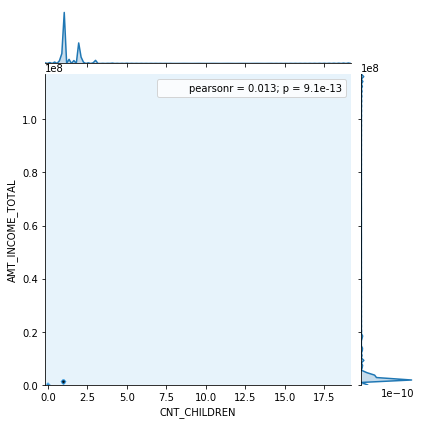

In [12]:
sns.jointplot('CNT_CHILDREN','AMT_INCOME_TOTAL',df,kind="kde")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



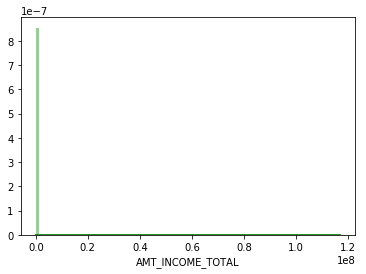

In [11]:
sns.distplot(df["AMT_INCOME_TOTAL"].dropna(),color="green", kde=True,bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fc92bd5c88>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc92bdc588>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc92bd5b38>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc92bdcdd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc92be3240>],
 'means': []}

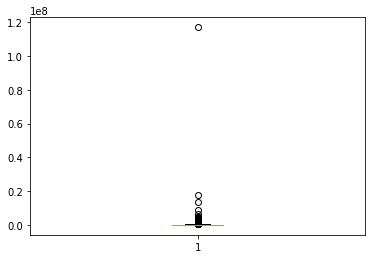

In [14]:
plt.boxplot(df["AMT_INCOME_TOTAL"])

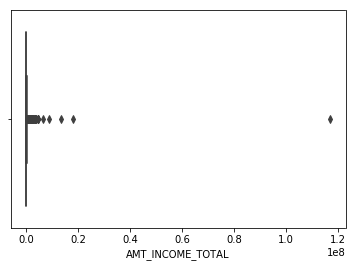

In [15]:
sns.boxplot(df['AMT_INCOME_TOTAL'])

In [10]:
cat_feats_cont= ['NAME_CONTRACT_TYPE']

In [11]:
cont_type = pd.get_dummies(df,columns=cat_feats_cont,drop_first=True)

In [12]:
cont_type.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002       1           M            N               Y             0   
1      100003       0           F            N               N             0   
2      100004       0           M            Y               Y             0   
3      100006       0           F            N               Y             0   
4      100007       0           M            N               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   

                  ...                 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0                 ...                                0                0   
1                 ...                                0                0   
2                 ...                                0                0   
3                 ...                                0                0   
4                 ...                                0                0   

  FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                0                        0.0                       0.0   
1                0                        0.0                       0.0   
2                0                        0.0                       0.0   
3                0                        NaN                       NaN   
4                0                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                        0.0                         1.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   NAME_CONTRACT_TYPE_Revolving loans  
0                                   0  
1                                   0  
2                                   1  
3                                   0  
4                                   0  

[5 rows x 122 columns]

In [13]:
cat_feats_gen = ['CODE_GENDER']
cat_feats_car = ['FLAG_OWN_CAR']
cat_feats_realty = ['FLAG_OWN_REALTY']

In [14]:
gen_type = pd.get_dummies(cont_type,columns=cat_feats_gen,drop_first=1)
own_car = pd.get_dummies(gen_type,columns=cat_feats_car,drop_first=1)
own_realty = pd.get_dummies(own_car,columns=cat_feats_realty,drop_first=1)

In [15]:
own_realty.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      24700.5         351000.0   Unaccompanied          Working   
1      35698.5        1129500.0          Family    State servant   
2       6750.0         135000.0   Unaccompanied          Working   
3      29686.5         297000.0   Unaccompanied          Working   
4      21865.5         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE        ...         AMT_REQ_CREDIT_BUREAU_DAY  \
0  Secondary / secondary special        ...                               0.0   
1               Higher education        ...                               0.0   
2  Secondary / secondary special        ...                               0.0   
3  Secondary / secondary special        ...                               NaN   
4  Secondary / secondary special        ...                               0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                        0.0                         1.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   NAME_CONTRACT_TYPE_Revolving loans  CODE_GENDER_M  CODE_GENDER_XNA  \
0                                   0              1                0   
1                                   0              0                0   
2                                   1              1                0   
3                                   0              0                0   
4                                   0              1                0   

   FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  
0               0                  1  
1               0                  0  
2               1                  1  
3               0                  1  
4               0                  1  

[5 rows x 123 columns]

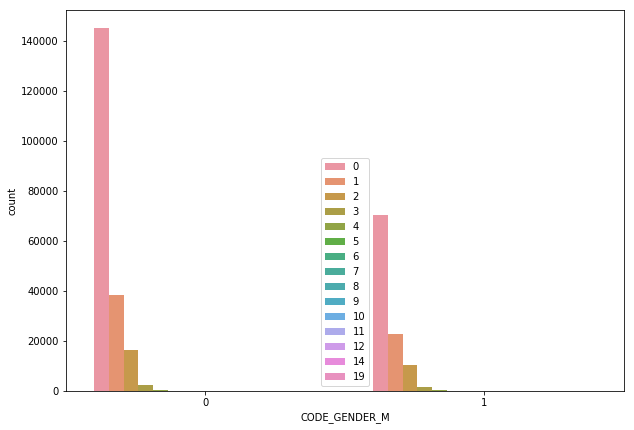

In [22]:
plt.figure(figsize=(10,7),frameon=False)
sns.countplot(x='CODE_GENDER_M',hue='CNT_CHILDREN',data=own_realty,orient="h")
plt.legend(loc='best')

In [16]:
df['OCCUPATION_TYPE'].head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

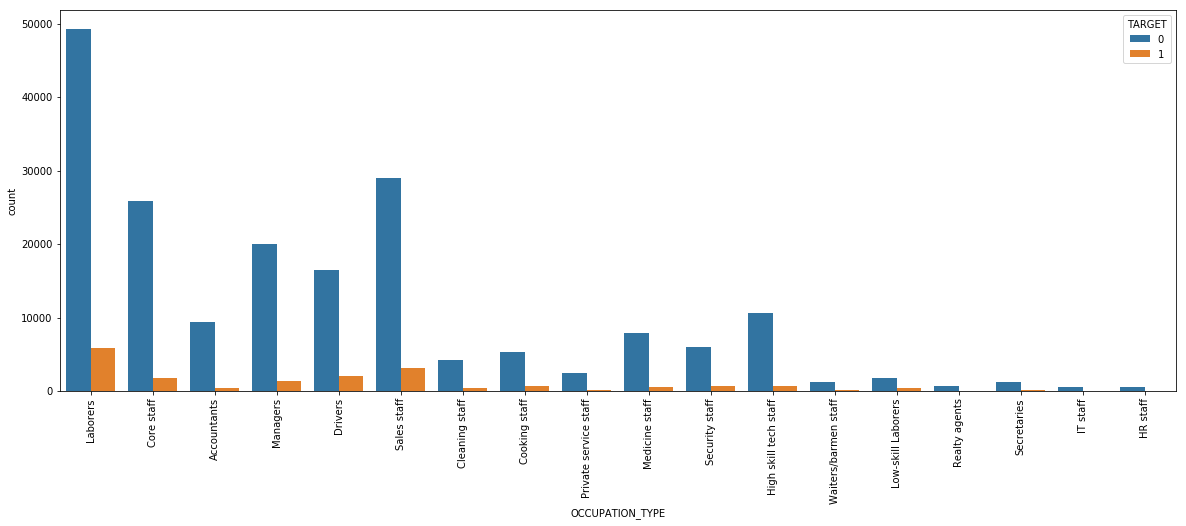

In [19]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.countplot(x='OCCUPATION_TYPE',hue='TARGET',data=df)

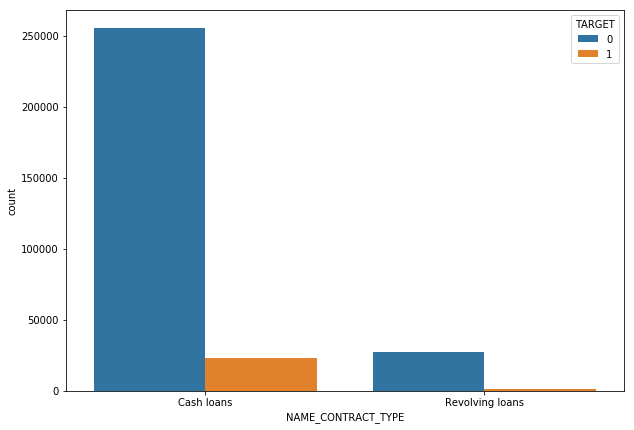

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(x='NAME_CONTRACT_TYPE',hue='TARGET',data=df)

In [17]:
df['NAME_FAMILY_STATUS'].reset_index()

index    NAME_FAMILY_STATUS
0            0  Single / not married
1            1               Married
2            2  Single / not married
3            3        Civil marriage
4            4  Single / not married
5            5               Married
6            6               Married
7            7               Married
8            8               Married
9            9  Single / not married
10          10               Married
11          11               Married
12          12               Married
13          13               Married
14          14               Married
15          15  Single / not married
16          16               Married
17          17               Married
18          18                 Widow
19          19  Single / not married
20          20               Married
21          21               Married
22          22               Married
23          23               Married
24          24               Married
25          25               Married
26          26                 Widow
27          27               Married
28          28  Single / not married
29          29  Single / not married
...        ...                   ...
307481  307481               Married
307482  307482               Married
307483  307483             Separated
307484  307484               Married
307485  307485             Separated
307486  307486        Civil marriage
307487  307487               Married
307488  307488  Single / not married
307489  307489        Civil marriage
307490  307490  Single / not married
307491  307491               Married
307492  307492               Married
307493  307493               Married
307494  307494               Married
307495  307495               Married
307496  307496               Married
307497  307497               Married
307498  307498               Married
307499  307499               Married
307500  307500               Married
307501  307501               Married
307502  307502               Married
307503  307503  Single / not married
307504  307504             Separated
307505  307505  Single / not married
307506  307506             Separated
307507  307507                 Widow
307508  307508             Separated
307509  307509               Married
307510  307510               Married

[307511 rows x 2 columns]

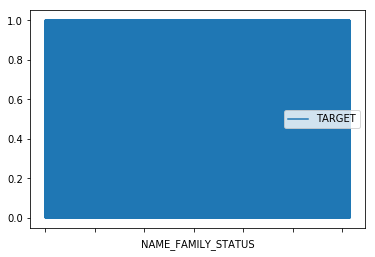

In [27]:
df.plot(x='NAME_FAMILY_STATUS',y='TARGET')

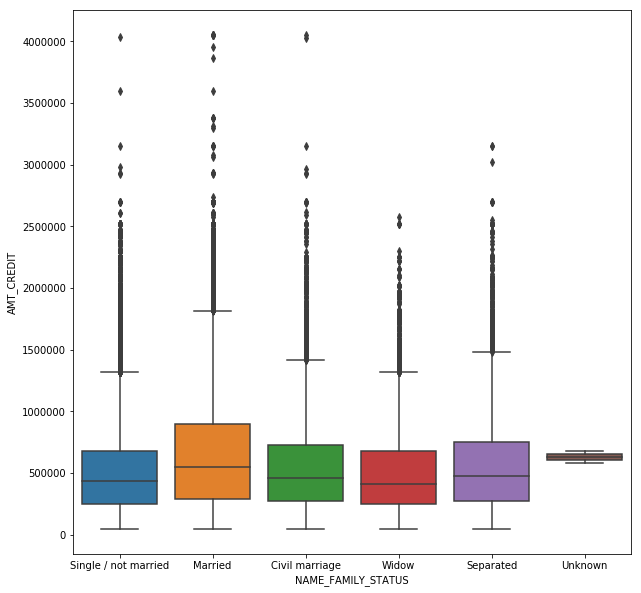

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(x='NAME_FAMILY_STATUS',y='AMT_CREDIT',data=df)

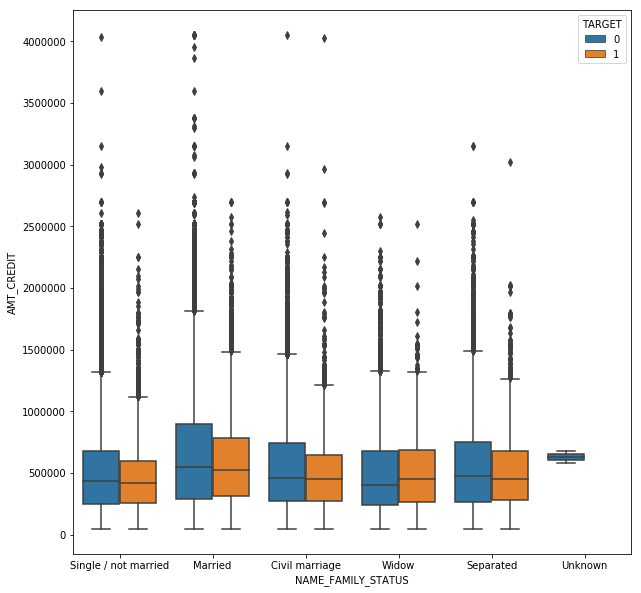

In [22]:
#plt.figure(figsize=(10,7))
#df.iplot(kind='box', x='NAME_FAMILY_STATUS',y='AMT_CREDIT')
plt.figure(figsize=(10,10))
sns.boxplot(x='NAME_FAMILY_STATUS',y='AMT_CREDIT',hue='TARGET',data=df)

Text(0,0.5,'$ Per Annum')

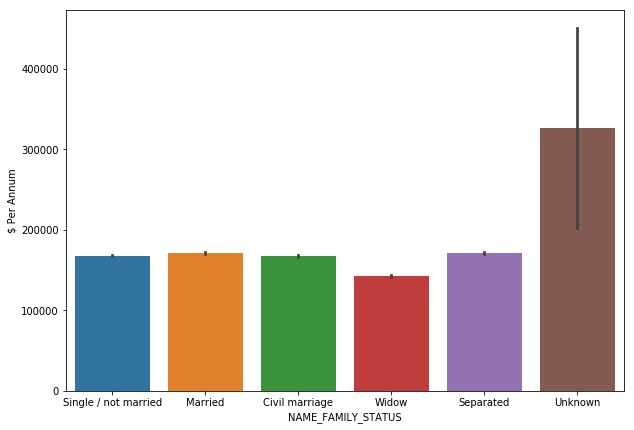

In [23]:
plt.figure(figsize=(10,7))
sns.barplot(x='NAME_FAMILY_STATUS', y= 'AMT_INCOME_TOTAL',data=df)
plt.ylabel('$ Per Annum')

Text(0,0.5,'$ Per Annum')

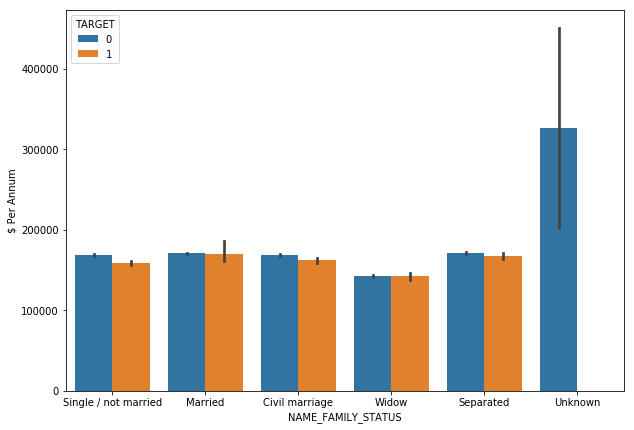

In [24]:
plt.figure(figsize=(10,7))
sns.barplot(x='NAME_FAMILY_STATUS', y= 'AMT_INCOME_TOTAL',data=df,hue='TARGET')
plt.ylabel('$ Per Annum')

In [18]:
df['CNT_FAM_MEMBERS']

0         1.0
1         2.0
2         1.0
3         2.0
4         1.0
5         2.0
6         3.0
7         2.0
8         2.0
9         1.0
10        3.0
11        2.0
12        2.0
13        3.0
14        2.0
15        1.0
16        2.0
17        3.0
18        1.0
19        2.0
20        2.0
21        3.0
22        3.0
23        2.0
24        4.0
25        2.0
26        1.0
27        3.0
28        1.0
29        1.0
         ... 
307481    2.0
307482    2.0
307483    1.0
307484    2.0
307485    2.0
307486    3.0
307487    2.0
307488    1.0
307489    2.0
307490    1.0
307491    4.0
307492    2.0
307493    2.0
307494    3.0
307495    2.0
307496    2.0
307497    2.0
307498    2.0
307499    2.0
307500    2.0
307501    5.0
307502    3.0
307503    1.0
307504    1.0
307505    1.0
307506    1.0
307507    1.0
307508    1.0
307509    2.0
307510    2.0
Name: CNT_FAM_MEMBERS, Length: 307511, dtype: float64

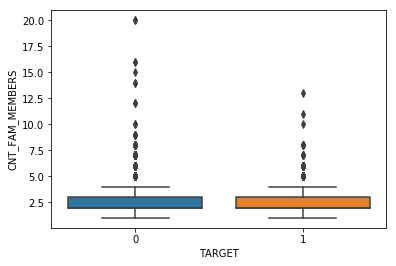

In [33]:
sns.boxplot(x='TARGET',y='CNT_FAM_MEMBERS',data=df)

In [19]:
df['NAME_HOUSING_TYPE'].reset_index()

index  NAME_HOUSING_TYPE
0            0  House / apartment
1            1  House / apartment
2            2  House / apartment
3            3  House / apartment
4            4  House / apartment
5            5  House / apartment
6            6  House / apartment
7            7  House / apartment
8            8  House / apartment
9            9  House / apartment
10          10  House / apartment
11          11  House / apartment
12          12  House / apartment
13          13  House / apartment
14          14  House / apartment
15          15   Rented apartment
16          16  House / apartment
17          17  House / apartment
18          18  House / apartment
19          19  House / apartment
20          20  House / apartment
21          21  House / apartment
22          22   Rented apartment
23          23  House / apartment
24          24  House / apartment
25          25  House / apartment
26          26  House / apartment
27          27  House / apartment
28          28  House / apartment
29          29       With parents
...        ...                ...
307481  307481  House / apartment
307482  307482  House / apartment
307483  307483  House / apartment
307484  307484   Rented apartment
307485  307485       With parents
307486  307486  House / apartment
307487  307487  House / apartment
307488  307488  House / apartment
307489  307489  House / apartment
307490  307490  House / apartment
307491  307491  House / apartment
307492  307492  House / apartment
307493  307493  House / apartment
307494  307494  House / apartment
307495  307495  House / apartment
307496  307496  House / apartment
307497  307497  House / apartment
307498  307498  House / apartment
307499  307499  House / apartment
307500  307500  House / apartment
307501  307501  House / apartment
307502  307502  House / apartment
307503  307503  House / apartment
307504  307504  House / apartment
307505  307505  House / apartment
307506  307506       With parents
307507  307507  House / apartment
307508  307508  House / apartment
307509  307509  House / apartment
307510  307510  House / apartment

[307511 rows x 2 columns]

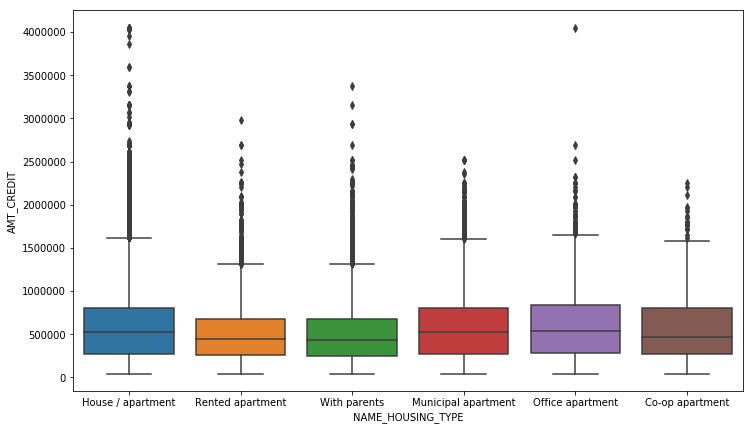

In [35]:
plt.figure(figsize=(12,7))
sns.boxplot(x='NAME_HOUSING_TYPE',y = 'AMT_CREDIT',data=df)

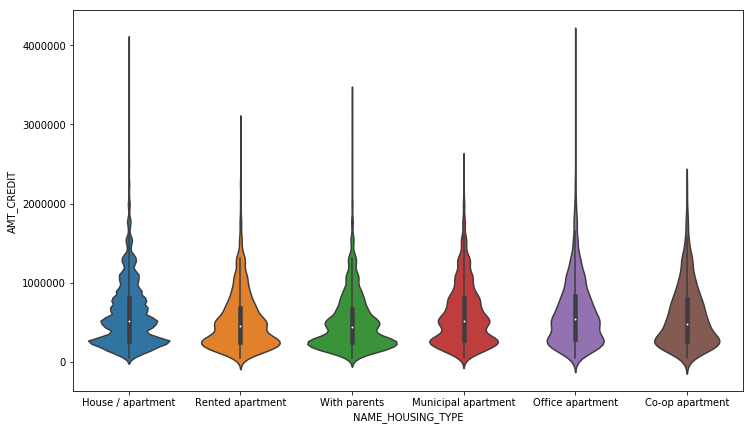

In [36]:
plt.figure(figsize=(12,7))
sns.violinplot(x='NAME_HOUSING_TYPE',y = 'AMT_CREDIT',data=df)

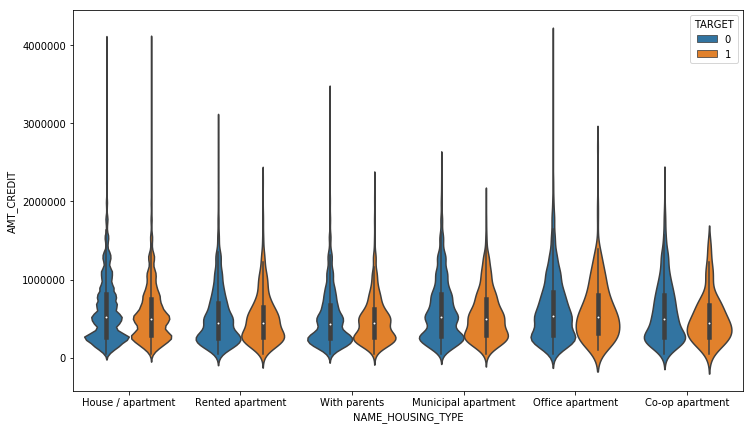

In [37]:
plt.figure(figsize=(12,7))
sns.violinplot(x='NAME_HOUSING_TYPE',y = 'AMT_CREDIT',data=df,hue = 'TARGET')

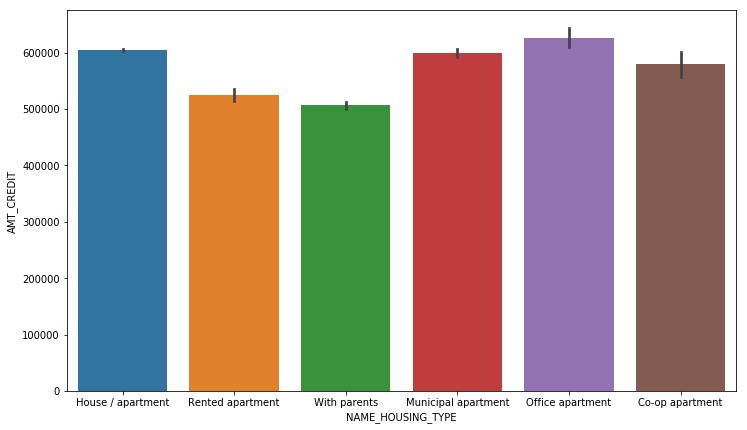

In [38]:
plt.figure(figsize=(12,7))
sns.barplot(x='NAME_HOUSING_TYPE',y = 'AMT_CREDIT',data=df)

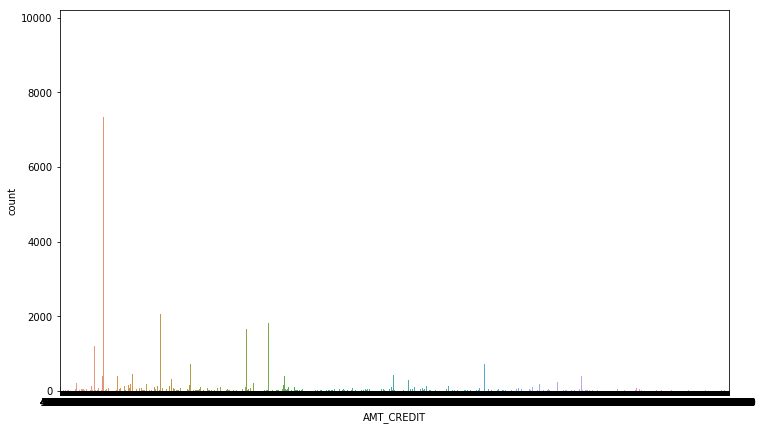

In [39]:
plt.figure(figsize=(12,7))
sns.countplot(x='AMT_CREDIT',data=df)

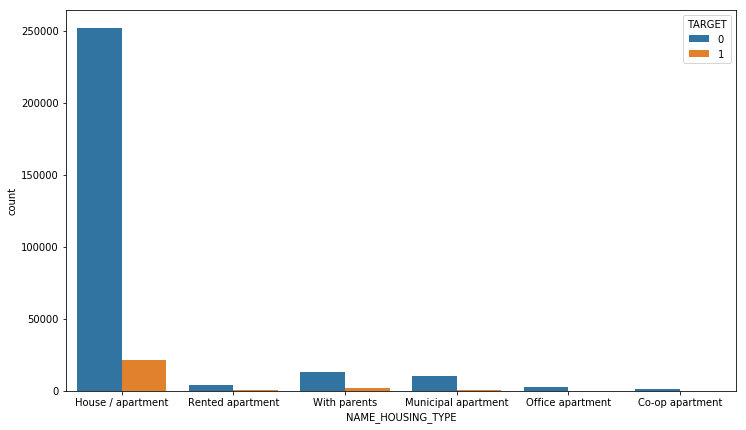

In [40]:
plt.figure(figsize=(12,7))
sns.countplot(x='NAME_HOUSING_TYPE',hue='TARGET',data=df)

In [20]:
Occupation_df = pd.DataFrame(data=df.groupby(['OCCUPATION_TYPE','TARGET']).count()['SK_ID_CURR'])

In [21]:
Occupation_df

SK_ID_CURR
OCCUPATION_TYPE       TARGET            
Accountants           0             9339
                      1              474
Cleaning staff        0             4206
                      1              447
Cooking staff         0             5325
                      1              621
Core staff            0            25832
                      1             1738
Drivers               0            16496
                      1             2107
HR staff              0              527
                      1               36
High skill tech staff 0            10679
                      1              701
IT staff              0              492
                      1               34
Laborers              0            49348
                      1             5838
Low-skill Laborers    0             1734
                      1              359
Managers              0            20043
                      1             1328
Medicine staff        0             7965
                      1              572
Private service staff 0             2477
                      1              175
Realty agents         0              692
                      1               59
Sales staff           0            29010
                      1             3092
Secretaries           0             1213
                      1               92
Security staff        0             5999
                      1              722
Waiters/barmen staff  0             1196
                      1              152

In [22]:
value_counts = Occupation_df['SK_ID_CURR'].values

In [23]:
value_counts

array([ 9339,   474,  4206,   447,  5325,   621, 25832,  1738, 16496,
        2107,   527,    36, 10679,   701,   492,    34, 49348,  5838,
        1734,   359, 20043,  1328,  7965,   572,  2477,   175,   692,
          59, 29010,  3092,  1213,    92,  5999,   722,  1196,   152],
      dtype=int64)

In [24]:
def repayers_to_applicants_ratio(values):
    """
    Finds the ratio of Repayers to Applicants. This kind of is a 
    measure for safety. Larger the value better the applicant - More 
    safe for the company to lend loan to this category of workers.
    
    values: array of entires whose counts are given
    returns the repayers to applicants ratio. 
    
    precondition: The counts are such that the targets alligned are
    in order 0 and 1
    """
    flag = 1
    ratios = []
    for count in range(len(values)):
        if flag == 1:
            current_number = values[count]
            next_number = values[count+1]
            ratios.append(current_number/(current_number+next_number))
            ratios.append(current_number/(current_number+next_number))
        flag=flag*-1
    return ratios
    

In [25]:
repayers_to_applicants_ratio(value_counts)

[0.9516967288291043,
 0.9516967288291043,
 0.903932946486138,
 0.903932946486138,
 0.8955600403632694,
 0.8955600403632694,
 0.9369604642727603,
 0.9369604642727603,
 0.8867386980594528,
 0.8867386980594528,
 0.9360568383658969,
 0.9360568383658969,
 0.9384007029876977,
 0.9384007029876977,
 0.935361216730038,
 0.935361216730038,
 0.8942123002210706,
 0.8942123002210706,
 0.8284758719541329,
 0.8284758719541329,
 0.9378597164381639,
 0.9378597164381639,
 0.9329975401194799,
 0.9329975401194799,
 0.9340120663650076,
 0.9340120663650076,
 0.9214380825565912,
 0.9214380825565912,
 0.9036820135817083,
 0.9036820135817083,
 0.9295019157088122,
 0.9295019157088122,
 0.8925755095967862,
 0.8925755095967862,
 0.887240356083086,
 0.887240356083086]

In [26]:
Occupation_df['RATIOS OF A/R'] = repayers_to_applicants_ratio(value_counts)

In [27]:
new_Occupation_df = Occupation_df.reset_index()


In [28]:
new_Occupation_df.drop(['TARGET'],axis=1)

OCCUPATION_TYPE  SK_ID_CURR  RATIOS OF A/R
0             Accountants        9339       0.951697
1             Accountants         474       0.951697
2          Cleaning staff        4206       0.903933
3          Cleaning staff         447       0.903933
4           Cooking staff        5325       0.895560
5           Cooking staff         621       0.895560
6              Core staff       25832       0.936960
7              Core staff        1738       0.936960
8                 Drivers       16496       0.886739
9                 Drivers        2107       0.886739
10               HR staff         527       0.936057
11               HR staff          36       0.936057
12  High skill tech staff       10679       0.938401
13  High skill tech staff         701       0.938401
14               IT staff         492       0.935361
15               IT staff          34       0.935361
16               Laborers       49348       0.894212
17               Laborers        5838       0.894212
18     Low-skill Laborers        1734       0.828476
19     Low-skill Laborers         359       0.828476
20               Managers       20043       0.937860
21               Managers        1328       0.937860
22         Medicine staff        7965       0.932998
23         Medicine staff         572       0.932998
24  Private service staff        2477       0.934012
25  Private service staff         175       0.934012
26          Realty agents         692       0.921438
27          Realty agents          59       0.921438
28            Sales staff       29010       0.903682
29            Sales staff        3092       0.903682
30            Secretaries        1213       0.929502
31            Secretaries          92       0.929502
32         Security staff        5999       0.892576
33         Security staff         722       0.892576
34   Waiters/barmen staff        1196       0.887240
35   Waiters/barmen staff         152       0.887240

In [29]:
new_Occupation_df1= new_Occupation_df.drop(labels=['SK_ID_CURR'],axis=1)

In [30]:
new_Occupation_df1['RATIOS OF A/R']

0     0.951697
1     0.951697
2     0.903933
3     0.903933
4     0.895560
5     0.895560
6     0.936960
7     0.936960
8     0.886739
9     0.886739
10    0.936057
11    0.936057
12    0.938401
13    0.938401
14    0.935361
15    0.935361
16    0.894212
17    0.894212
18    0.828476
19    0.828476
20    0.937860
21    0.937860
22    0.932998
23    0.932998
24    0.934012
25    0.934012
26    0.921438
27    0.921438
28    0.903682
29    0.903682
30    0.929502
31    0.929502
32    0.892576
33    0.892576
34    0.887240
35    0.887240
Name: RATIOS OF A/R, dtype: float64

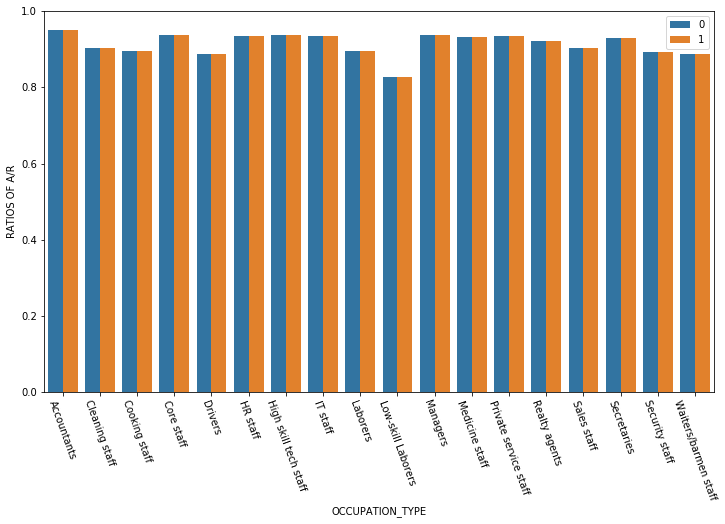

In [38]:
plt.figure(figsize=(12,7))
sns.barplot(x='OCCUPATION_TYPE',y='RATIOS OF A/R',data=new_Occupation_df1,hue='TARGET')
plt.xticks(rotation=290)
plt.legend(loc = 'best')






In [31]:
new_df=df

In [32]:
new_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

In [33]:
new_df = pd.merge(left=own_realty,right=new_Occupation_df1,on='OCCUPATION_TYPE')

In [34]:
new_df.head()

SK_ID_CURR  TARGET_x  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002         1             0          202500.0    406597.5   
1      100002         1             0          202500.0    406597.5   
2      100004         0             0           67500.0    135000.0   
3      100004         0             0           67500.0    135000.0   
4      100006         0             0          135000.0    312682.5   

   AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      24700.5         351000.0   Unaccompanied          Working   
1      24700.5         351000.0   Unaccompanied          Working   
2       6750.0         135000.0   Unaccompanied          Working   
3       6750.0         135000.0   Unaccompanied          Working   
4      29686.5         297000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE      ...       AMT_REQ_CREDIT_BUREAU_MON  \
0  Secondary / secondary special      ...                             0.0   
1  Secondary / secondary special      ...                             0.0   
2  Secondary / secondary special      ...                             0.0   
3  Secondary / secondary special      ...                             0.0   
4  Secondary / secondary special      ...                             NaN   

  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                       0.0                         1.0   
1                       0.0                         1.0   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       NaN                         NaN   

   NAME_CONTRACT_TYPE_Revolving loans  CODE_GENDER_M  CODE_GENDER_XNA  \
0                                   0              1                0   
1                                   0              1                0   
2                                   1              1                0   
3                                   1              1                0   
4                                   0              0                0   

   FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  TARGET_y  RATIOS OF A/R  
0               0                  1         0       0.894212  
1               0                  1         1       0.894212  
2               1                  1         0       0.894212  
3               1                  1         1       0.894212  
4               0                  1         0       0.894212  

[5 rows x 125 columns]

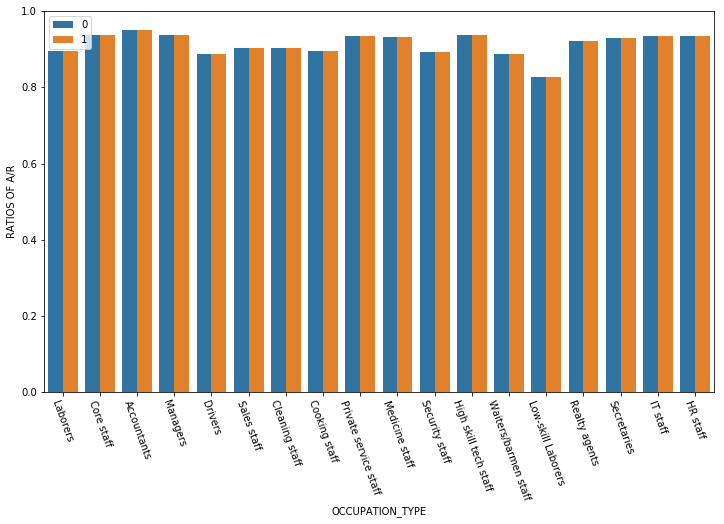

In [57]:
plt.figure(figsize=(12,7))
sns.barplot(x='OCCUPATION_TYPE',y='RATIOS OF A/R',data=new_df,hue='CODE_GENDER_M')
plt.xticks(rotation=290)
plt.legend(loc = 'best')

In [35]:
new_df

SK_ID_CURR  TARGET_x  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002         1             0          202500.0    406597.5   
1           100002         1             0          202500.0    406597.5   
2           100004         0             0           67500.0    135000.0   
3           100004         0             0           67500.0    135000.0   
4           100006         0             0          135000.0    312682.5   
5           100006         0             0          135000.0    312682.5   
6           100008         0             0           99000.0    490495.5   
7           100008         0             0           99000.0    490495.5   
8           100012         0             0          135000.0    405000.0   
9           100012         0             0          135000.0    405000.0   
10          100016         0             0           67500.0     80865.0   
11          100016         0             0           67500.0     80865.0   
12          100018         0             0          189000.0    773680.5   
13          100018         0             0          189000.0    773680.5   
14          100019         0             0          157500.0    299772.0   
15          100019         0             0          157500.0    299772.0   
16          100021         0             1           81000.0    270000.0   
17          100021         0             1           81000.0    270000.0   
18          100022         0             0          112500.0    157500.0   
19          100022         0             0          112500.0    157500.0   
20          100024         0             0          135000.0    427500.0   
21          100024         0             0          135000.0    427500.0   
22          100032         0             1          112500.0    327024.0   
23          100032         0             1          112500.0    327024.0   
24          100034         0             0           90000.0    180000.0   
25          100034         0             0           90000.0    180000.0   
26          100037         0             0           90000.0    199008.0   
27          100037         0             0           90000.0    199008.0   
28          100047         1             0          202500.0   1193580.0   
29          100047         1             0          202500.0   1193580.0   
...            ...       ...           ...               ...         ...   
422210      448992         0             0          157500.0   1078200.0   
422211      448992         0             0          157500.0   1078200.0   
422212      449348         0             1          144000.0    720000.0   
422213      449348         0             1          144000.0    720000.0   
422214      449647         0             0           90000.0    415408.5   
422215      449647         0             0           90000.0    415408.5   
422216      450508         0             0          225000.0    135000.0   
422217      450508         0             0          225000.0    135000.0   
422218      450831         0             2          135000.0    900000.0   
422219      450831         0             2          135000.0    900000.0   
422220      451046         0             1          202500.0   1288350.0   
422221      451046         0             1          202500.0   1288350.0   
422222      451157         0             1          135000.0    225000.0   
422223      451157         0             1          135000.0    225000.0   
422224      452211         0             0          193500.0    149256.0   
422225      452211         0             0          193500.0    149256.0   
422226      453306         0             0           81000.0    180000.0   
422227      453306         0             0           81000.0    180000.0   
422228      453456         0             0          135000.0    675000.0   
422229      453456         0             0          135000.0    675000.0   
422230      454388         0             1          2250

In [36]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

In [37]:
new_df.reset_index().head()

index  SK_ID_CURR  TARGET_x  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      0      100002         1             0          202500.0    406597.5   
1      1      100002         1             0          202500.0    406597.5   
2      2      100004         0             0           67500.0    135000.0   
3      3      100004         0             0           67500.0    135000.0   
4      4      100006         0             0          135000.0    312682.5   

   AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      24700.5         351000.0   Unaccompanied          Working   
1      24700.5         351000.0   Unaccompanied          Working   
2       6750.0         135000.0   Unaccompanied          Working   
3       6750.0         135000.0   Unaccompanied          Working   
4      29686.5         297000.0   Unaccompanied          Working   

       ...       AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0      ...                             0.0                       0.0   
1      ...                             0.0                       0.0   
2      ...                             0.0                       0.0   
3      ...                             0.0                       0.0   
4      ...                             NaN                       NaN   

  AMT_REQ_CREDIT_BUREAU_YEAR  NAME_CONTRACT_TYPE_Revolving loans  \
0                        1.0                                   0   
1                        1.0                                   0   
2                        0.0                                   1   
3                        0.0                                   1   
4                        NaN                                   0   

   CODE_GENDER_M  CODE_GENDER_XNA  FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  \
0              1                0               0                  1   
1              1                0               0                  1   
2              1                0               1                  1   
3              1                0               1                  1   
4              0                0               0                  1   

   TARGET_y  RATIOS OF A/R  
0         0       0.894212  
1         1       0.894212  
2         0       0.894212  
3         1       0.894212  
4         0       0.894212  

[5 rows x 126 columns]

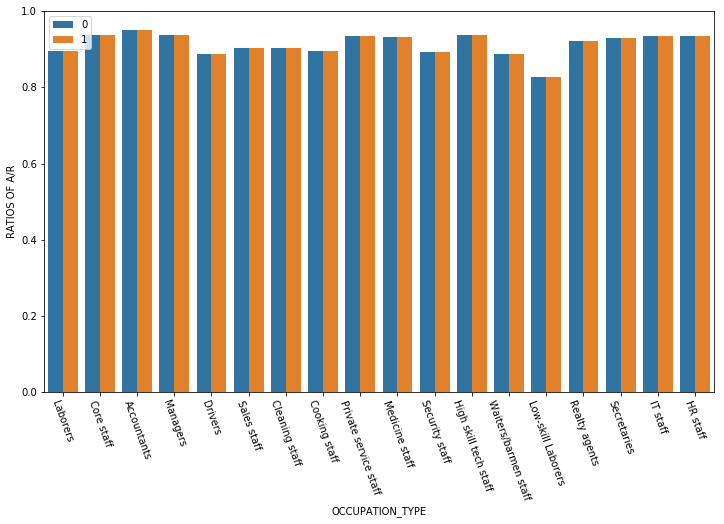

In [61]:
plt.figure(figsize=(12,7))
sns.barplot(x='OCCUPATION_TYPE',y='RATIOS OF A/R',data=new_df,hue='CODE_GENDER_M')
plt.xticks(rotation=290)
plt.legend(loc = 'best')

In [38]:
pd.DataFrame(df.groupby(['CODE_GENDER','TARGET']).count()['SK_ID_CURR']).reset_index()


CODE_GENDER  TARGET  SK_ID_CURR
0           F       0      188278
1           F       1       14170
2           M       0       94404
3           M       1       10655
4         XNA       0           4

In [39]:
### To find out the probability here's what we have to do:
print("probability that an applicant will repay the given that he is a male P(R|M): 94404/(94404+10655) = 0.8985") 
print("probability that an applicant will repay the given that she is a female P(R|F): 188278/(188278+14170) = 0.9300")

probability that an applicant will repay the given that he is a male P(R|M): 94404/(94404+10655) = 0.8985
probability that an applicant will repay the given that she is a female P(R|F): 188278/(188278+14170) = 0.9300


In [40]:
Sex_repay_ratio = pd.DataFrame({"CODE_GENDER":['M','F'], 'Repay Ratio': [0.8985,0.9300]})

In [41]:
Sex_repay_ratio

CODE_GENDER  Repay Ratio
0           M       0.8985
1           F       0.9300

In [42]:
tyy = pd.merge(left=df,right=Sex_repay_ratio,on='CODE_GENDER')

In [43]:
new_df = pd.merge(left=df,right=Sex_repay_ratio,on='CODE_GENDER')

In [44]:
new_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100004       0    Revolving loans           M            Y   
2      100007       0         Cash loans           M            N   
3      100008       0         Cash loans           M            N   
4      100010       0         Cash loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               Y             0           67500.0    135000.0       6750.0   
2               Y             0          121500.0    513000.0      21865.5   
3               Y             0           99000.0    490495.5      27517.5   
4               Y             0          360000.0   1530000.0      42075.0   

      ...       FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0     ...                      0                0                0   
1     ...                      0                0                0   
2     ...                      0                0                0   
3     ...                      0                0                0   
4     ...                      0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  Repay Ratio  
0                        0.0                         1.0       0.8985  
1                        0.0                         0.0       0.8985  
2                        0.0                         0.0       0.8985  
3                        1.0                         1.0       0.8985  
4                        0.0                         0.0       0.8985  

[5 rows x 123 columns]

In [45]:
new_df = pd.merge(left =new_df,right=new_Occupation_df1,on='OCCUPATION_TYPE')

In [46]:
new_df.head()

SK_ID_CURR  TARGET_x NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002         1         Cash loans           M            N   
1      100002         1         Cash loans           M            N   
2      100004         0    Revolving loans           M            Y   
3      100004         0    Revolving loans           M            Y   
4      100008         0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               Y             0          202500.0    406597.5      24700.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0           67500.0    135000.0       6750.0   
4               Y             0           99000.0    490495.5      27517.5   

       ...        FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0      ...                       0                        0.0   
1      ...                       0                        0.0   
2      ...                       0                        0.0   
3      ...                       0                        0.0   
4      ...                       0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       1.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  Repay Ratio  TARGET_y  RATIOS OF A/R  
0                         1.0       0.8985         0       0.894212  
1                         1.0       0.8985         1       0.894212  
2                         0.0       0.8985         0       0.894212  
3                         0.0       0.8985         1       0.894212  
4                         1.0       0.8985         0       0.894212  

[5 rows x 125 columns]

In [47]:
new_df['Total Ratio'] = new_df['Repay Ratio']*new_df['RATIOS OF A/R'] 

In [48]:
new_df.head()

SK_ID_CURR  TARGET_x NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002         1         Cash loans           M            N   
1      100002         1         Cash loans           M            N   
2      100004         0    Revolving loans           M            Y   
3      100004         0    Revolving loans           M            Y   
4      100008         0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               Y             0          202500.0    406597.5      24700.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0           67500.0    135000.0       6750.0   
4               Y             0           99000.0    490495.5      27517.5   

      ...       AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0     ...                              0.0                       0.0   
1     ...                              0.0                       0.0   
2     ...                              0.0                       0.0   
3     ...                              0.0                       0.0   
4     ...                              0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  Repay Ratio  TARGET_y  \
0                       0.0                        1.0       0.8985         0   
1                       0.0                        1.0       0.8985         1   
2                       0.0                        0.0       0.8985         0   
3                       0.0                        0.0       0.8985         1   
4                       1.0                        1.0       0.8985         0   

   RATIOS OF A/R  Total Ratio  
0       0.894212      0.80345  
1       0.894212      0.80345  
2       0.894212      0.80345  
3       0.894212      0.80345  
4       0.894212      0.80345  

[5 rows x 126 columns]

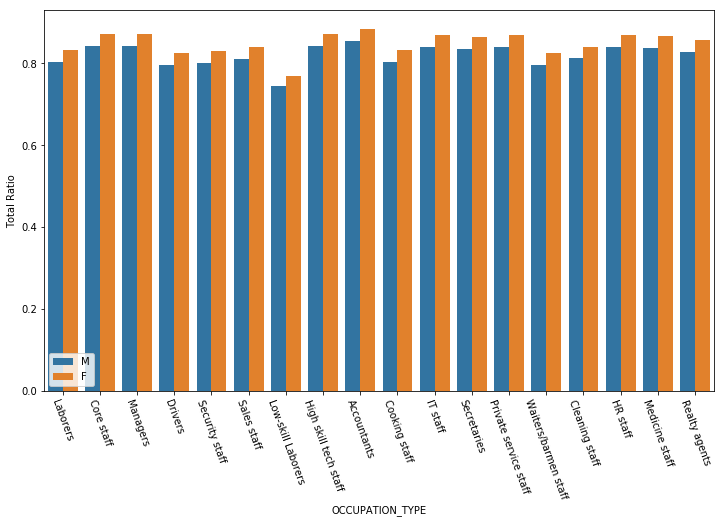

In [73]:
plt.figure(figsize=(12,7))
sns.barplot(x='OCCUPATION_TYPE',y='Total Ratio',hue='CODE_GENDER',data=new_df)
plt.xticks(rotation=290)
plt.legend(loc='best')

In [49]:
new_df.reset_index()

index  SK_ID_CURR  TARGET_x NAME_CONTRACT_TYPE CODE_GENDER  \
0            0      100002         1         Cash loans           M   
1            1      100002         1         Cash loans           M   
2            2      100004         0    Revolving loans           M   
3            3      100004         0    Revolving loans           M   
4            4      100008         0         Cash loans           M   
5            5      100008         0         Cash loans           M   
6            6      100012         0    Revolving loans           M   
7            7      100012         0    Revolving loans           M   
8            8      100019         0         Cash loans           M   
9            9      100019         0         Cash loans           M   
10          10      100024         0    Revolving loans           M   
11          11      100024         0    Revolving loans           M   
12          12      100032         0         Cash loans           M   
13          13      100032         0         Cash loans           M   
14          14      100034         0    Revolving loans           M   
15          15      100034         0    Revolving loans           M   
16          16      100047         1         Cash loans           M   
17          17      100047         1         Cash loans           M   
18          18      100056         0         Cash loans           M   
19          19      100056         0         Cash loans           M   
20          20      100069         0         Cash loans           M   
21          21      100069         0         Cash loans           M   
22          22      100079         0    Revolving loans           M   
23          23      100079         0    Revolving loans           M   
24          24      100081         0         Cash loans           M   
25          25      100081         0         Cash loans           M   
26          26      100082         0         Cash loans           M   
27          27      100082         0         Cash loans           M   
28          28      100083         0         Cash loans           M   
29          29      100083         0         Cash loans           M   
...        ...         ...       ...                ...         ...   
422206  422206      450713         0         Cash loans           F   
422207  422207      450713         0         Cash loans           F   
422208  422208      451689         0         Cash loans           F   
422209  422209      451689         0         Cash loans           F   
422210  422210      451715         0         Cash loans           F   
422211  422211      451715         0         Cash loans           F   
422212  422212      451790         0         Cash loans           F   
422213  422213      451790         0         Cash loans           F   
422214  422214      451928         0         Cash loans           F   
422215  422215      451928         0         Cash loans           F   
422216  422216      452232         0         Cash loans           F   
422217  422217      452232         0         Cash loans           F   
422218  422218      452279         0         Cash loans           F   
422219  422219      452279         0         Cash loans           F   
422220  422220      452361         0    Revolving loans           F   
422221  422221      452361         0    Revolving loans           F   
422222  422222      452566         0         Cash loans           F   
422223  422223      452566         0         Cash loans           F   
422224  422224      453243         0         Cash loans           F   
422225  422225      453243         0         Cash loans           F   
422226  422226      453376         0         Cash loans           F   
422227  422227      453376         0         Cash loans           F   
422228  422228      453407         0    Revolving loans           F   
422229  422229      453407         0    Revolving loans           F   
422230  422230      453430       

In [50]:
new_df.head()

SK_ID_CURR  TARGET_x NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002         1         Cash loans           M            N   
1      100002         1         Cash loans           M            N   
2      100004         0    Revolving loans           M            Y   
3      100004         0    Revolving loans           M            Y   
4      100008         0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               Y             0          202500.0    406597.5      24700.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0           67500.0    135000.0       6750.0   
4               Y             0           99000.0    490495.5      27517.5   

      ...       AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0     ...                              0.0                       0.0   
1     ...                              0.0                       0.0   
2     ...                              0.0                       0.0   
3     ...                              0.0                       0.0   
4     ...                              0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  Repay Ratio  TARGET_y  \
0                       0.0                        1.0       0.8985         0   
1                       0.0                        1.0       0.8985         1   
2                       0.0                        0.0       0.8985         0   
3                       0.0                        0.0       0.8985         1   
4                       1.0                        1.0       0.8985         0   

   RATIOS OF A/R  Total Ratio  
0       0.894212      0.80345  
1       0.894212      0.80345  
2       0.894212      0.80345  
3       0.894212      0.80345  
4       0.894212      0.80345  

[5 rows x 126 columns]

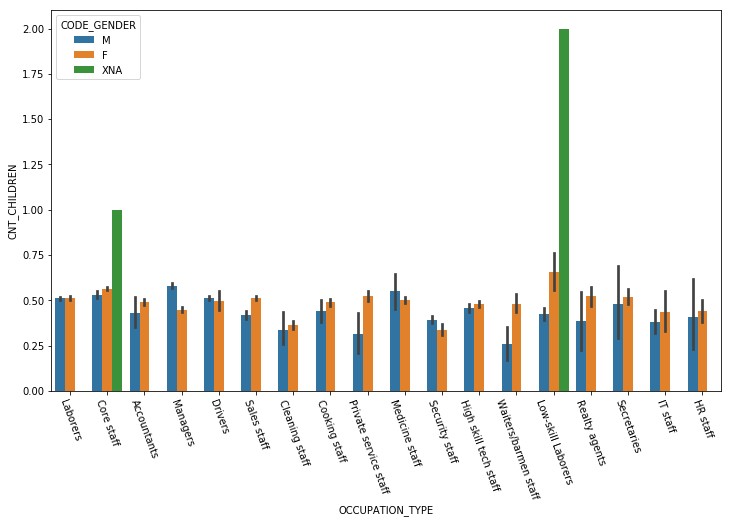

In [76]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=290)
sns.barplot(x='OCCUPATION_TYPE',y='CNT_CHILDREN',data=df,hue='CODE_GENDER')

In [52]:
from sklearn.preprocessing import Imputer
my_imputer = Imputer()

In [53]:
missing_values_count=new_df.isnull()

In [54]:
trial1=df.fillna(method='pad').copy()

In [55]:
total_cells = np.product(new_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing|
(total_missing/total_cells) * 100

SK_ID_CURR                    0.000000
TARGET_x                      0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
CNT_CHILDREN                  0.000000
AMT_INCOME_TOTAL              0.000000
AMT_CREDIT                    0.000000
AMT_ANNUITY                   0.000045
AMT_GOODS_PRICE               0.000831
NAME_TYPE_SUITE               0.003410
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
REGION_POPULATION_RELATIVE    0.000000
DAYS_BIRTH                    0.000000
DAYS_EMPLOYED                 0.000000
DAYS_REGISTRATION             0.000000
DAYS_ID_PUBLISH               0.000000
OWN_CAR_AGE                   0.492243
FLAG_MOBIL                    0.000000
FLAG_EMP_PHONE                0.000000
FLAG_WORK_PHONE               0.000000
FLAG_CONT_MOBILE         

In [56]:
missing_values_count

SK_ID_CURR  TARGET_x  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0            False     False               False        False         False   
1            False     False               False        False         False   
2            False     False               False        False         False   
3            False     False               False        False         False   
4            False     False               False        False         False   
5            False     False               False        False         False   
6            False     False               False        False         False   
7            False     False               False        False         False   
8            False     False               False        False         False   
9            False     False               False        False         False   
10           False     False               False        False         False   
11           False     False               False        False         False   
12           False     False               False        False         False   
13           False     False               False        False         False   
14           False     False               False        False         False   
15           False     False               False        False         False   
16           False     False               False        False         False   
17           False     False               False        False         False   
18           False     False               False        False         False   
19           False     False               False        False         False   
20           False     False               False        False         False   
21           False     False               False        False         False   
22           False     False               False        False         False   
23           False     False               False        False         False   
24           False     False               False        False         False   
25           False     False               False        False         False   
26           False     False               False        False         False   
27           False     False               False        False         False   
28           False     False               False        False         False   
29           False     False               False        False         False   
...            ...       ...                 ...          ...           ...   
422206       False     False               False        False         False   
422207       False     False               False        False         False   
422208       False     False               False        False         False   
422209       False     False               False        False         False   
422210       False     False               False        False         False   
422211       False     False               False        False         False   
422212       False     False               False        False         False   
422213       False     False               False        False         False   
422214       False     False               False        False         False   
422215       False     False               False        False         False   
422216       False     False               False        False         False   
422217       False     False               False        False         False   
422218       False     False               False        False         False   
422219       False     False               False        False         False   
422220       False     False               False        False         False   
422221       False     False               False        False         False   
422222       False     False               False        False         False   
422223       False     False               False        False         False   
422224       False     False               False        Fa

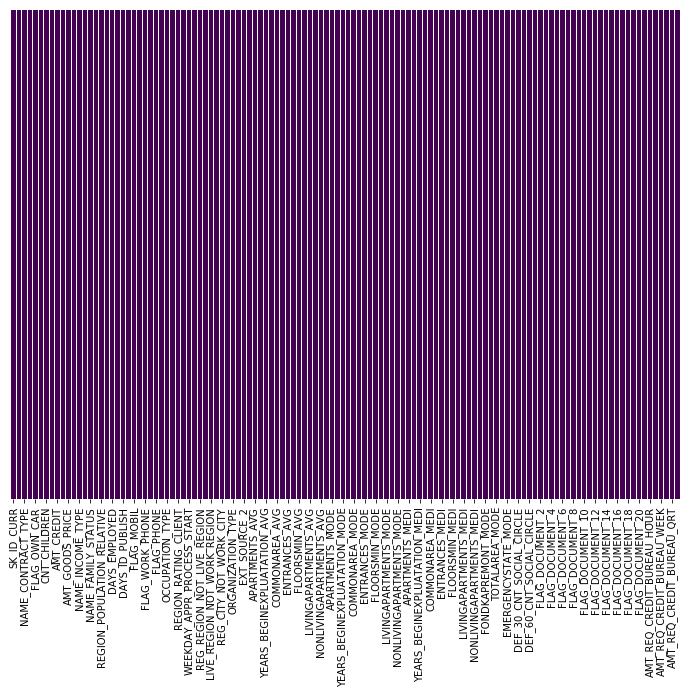

In [82]:
plt.figure(figsize=(12,9))
sns.heatmap(trial1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [57]:
trial1.isnull().sum()
trial1 = trial1.reset_index()

# TRAIN TEST  SPLIT

In [58]:
from sklearn.cross_validation import train_test_split


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [59]:
X = own_realty.drop(['TARGET'],axis = 1)
y = trial1['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [60]:
trial1.head()

index  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      0      100002       1         Cash loans           M            N   
1      1      100003       0         Cash loans           F            N   
2      2      100004       0    Revolving loans           M            Y   
3      3      100006       0         Cash loans           F            N   
4      4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0           67500.0    135000.0   
3               Y             0          135000.0    312682.5   
4               Y             0          121500.0    513000.0   

              ...              FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0             ...                             0                 0   
1             ...                             0                 0   
2             ...                             0                 0   
3             ...                             0                 0   
4             ...                             0                 0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        0.0   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0  

[5 rows x 123 columns]

In [61]:
from sklearn.tree import DecisionTreeClassifier


In [62]:
dtree = DecisionTreeClassifier()


In [63]:
trial1.head()

index  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      0      100002       1         Cash loans           M            N   
1      1      100003       0         Cash loans           F            N   
2      2      100004       0    Revolving loans           M            Y   
3      3      100006       0         Cash loans           F            N   
4      4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0           67500.0    135000.0   
3               Y             0          135000.0    312682.5   
4               Y             0          121500.0    513000.0   

              ...              FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0             ...                             0                 0   
1             ...                             0                 0   
2             ...                             0                 0   
3             ...                             0                 0   
4             ...                             0                 0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        0.0   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0  

[5 rows x 123 columns]

In [64]:
own_realty.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      24700.5         351000.0   Unaccompanied          Working   
1      35698.5        1129500.0          Family    State servant   
2       6750.0         135000.0   Unaccompanied          Working   
3      29686.5         297000.0   Unaccompanied          Working   
4      21865.5         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE        ...         AMT_REQ_CREDIT_BUREAU_DAY  \
0  Secondary / secondary special        ...                               0.0   
1               Higher education        ...                               0.0   
2  Secondary / secondary special        ...                               0.0   
3  Secondary / secondary special        ...                               NaN   
4  Secondary / secondary special        ...                               0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                        0.0                         1.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   NAME_CONTRACT_TYPE_Revolving loans  CODE_GENDER_M  CODE_GENDER_XNA  \
0                                   0              1                0   
1                                   0              0                0   
2                                   1              1                0   
3                                   0              0                0   
4                                   0              1                0   

   FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  
0               0                  1  
1               0                  0  
2               1                  1  
3               0                  1  
4               0                  1  

[5 rows x 123 columns]

In [65]:
import lightgbm as lgb

In [67]:
own_realty.reset_index()

index  SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0            0      100002       1             0        202500.000   
1            1      100003       0             0        270000.000   
2            2      100004       0             0         67500.000   
3            3      100006       0             0        135000.000   
4            4      100007       0             0        121500.000   
5            5      100008       0             0         99000.000   
6            6      100009       0             1        171000.000   
7            7      100010       0             0        360000.000   
8            8      100011       0             0        112500.000   
9            9      100012       0             0        135000.000   
10          10      100014       0             1        112500.000   
11          11      100015       0             0         38419.155   
12          12      100016       0             0         67500.000   
13          13      100017       0             1        225000.000   
14          14      100018       0             0        189000.000   
15          15      100019       0             0        157500.000   
16          16      100020       0             0        108000.000   
17          17      100021       0             1         81000.000   
18          18      100022       0             0        112500.000   
19          19      100023       0             1         90000.000   
20          20      100024       0             0        135000.000   
21          21      100025       0             1        202500.000   
22          22      100026       0             1        450000.000   
23          23      100027       0             0         83250.000   
24          24      100029       0             2        135000.000   
25          25      100030       0             0         90000.000   
26          26      100031       1             0        112500.000   
27          27      100032       0             1        112500.000   
28          28      100033       0             0        270000.000   
29          29      100034       0             0         90000.000   
...        ...         ...     ...           ...               ...   
307481  307481      456225       1             0        225000.000   
307482  307482      456226       0             0        225000.000   
307483  307483      456227       0             0         99000.000   
307484  307484      456228       0             0        540000.000   
307485  307485      456229       0             1        270000.000   
307486  307486      456230       0             1        292500.000   
307487  307487      456231       0             0        117000.000   
307488  307488      456232       0             0        157500.000   
307489  307489      456233       1             0        225000.000   
307490  307490      456234       0             0         81000.000   
307491  307491      456235       0             2         90000.000   
307492  307492      456236       0             0        585000.000   
307493  307493      456237       0             0        135000.000   
307494  307494      456238       0             1        270000.000   
307495  307495      456239       0             0        180000.000   
307496  307496      456240       0             0        360000.000   
307497  307497      456241       0             0        180000.000   
307498  307498      456242       0             0        198000.000   
307499  307499      456243       0             0         81000.000   
307500  307500      456244       0             0        261000.000   
307501  307501      456245       0             3         81000.000   
307502  307502      456246       0             1         94500.000   
307503  307503      456247       0             0        112500.000   
307504  307504      456248       0             0        153000.000   
307505  307505      456249       0             0        112500.000   
307506  307506     

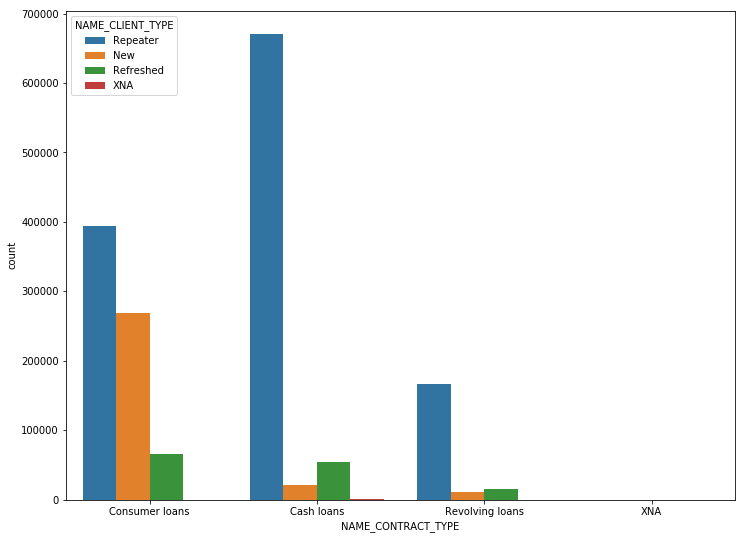

In [93]:
plt.figure(figsize=(12,9))
sns.countplot(x='NAME_CONTRACT_TYPE',data=df_prevs,hue='NAME_CLIENT_TYPE')

In [68]:
df_prevs['AMT_APPLICATION']

0            17145.0
1           607500.0
2           112500.0
3           450000.0
4           337500.0
5           315000.0
6                0.0
7                0.0
8                0.0
9                0.0
10          270000.0
11          211500.0
12          148500.0
13           53779.5
14           26550.0
15          126490.5
16           26955.0
17          180000.0
18          180000.0
19           45000.0
20          450000.0
21          405000.0
22               0.0
23         1129500.0
24               0.0
25          229500.0
26          369000.0
27          247500.0
28           74610.0
29               0.0
             ...    
1670184    1575000.0
1670185     450000.0
1670186          0.0
1670187          0.0
1670188     900000.0
1670189     796500.0
1670190          0.0
1670191      45000.0
1670192          0.0
1670193          0.0
1670194      90000.0
1670195     248535.0
1670196      57910.5
1670197     153220.5
1670198      22869.0
1670199      37926.0
1670200      

In [69]:
df_prevs['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

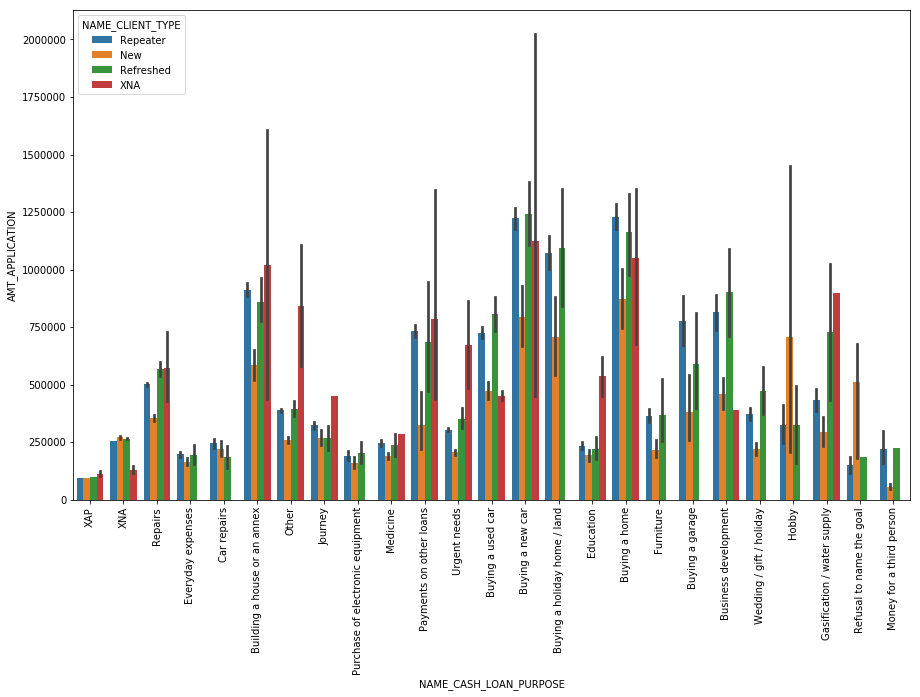

In [96]:
plt.figure(figsize=(15,9))
sns.barplot(x='NAME_CASH_LOAN_PURPOSE',y='AMT_APPLICATION',data=df_prevs,hue='NAME_CLIENT_TYPE')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

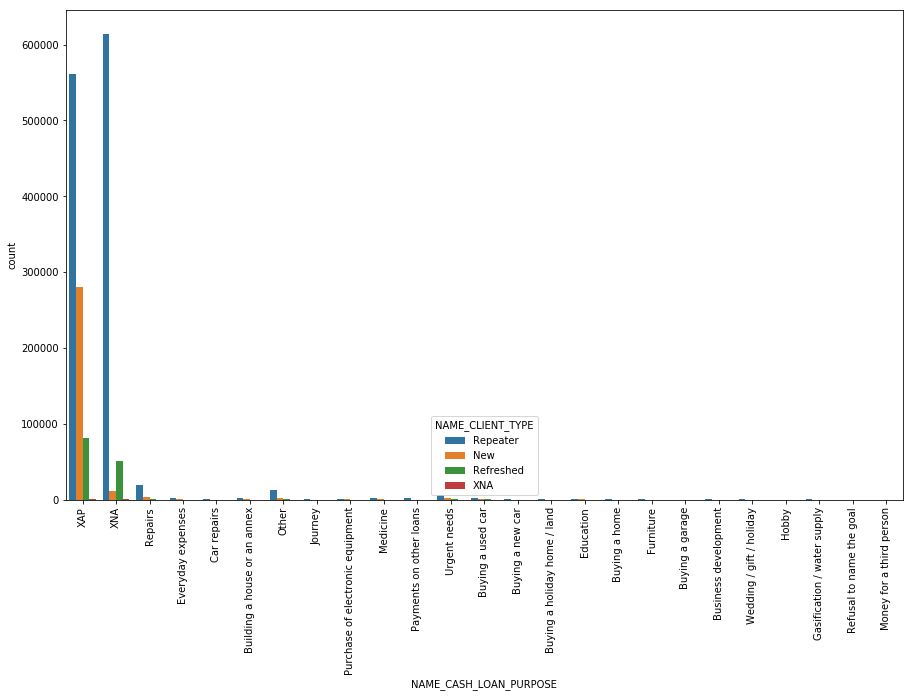

In [97]:
plt.figure(figsize=(15,9))
sns.countplot(x='NAME_CASH_LOAN_PURPOSE',data=df_prevs,hue='NAME_CLIENT_TYPE')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

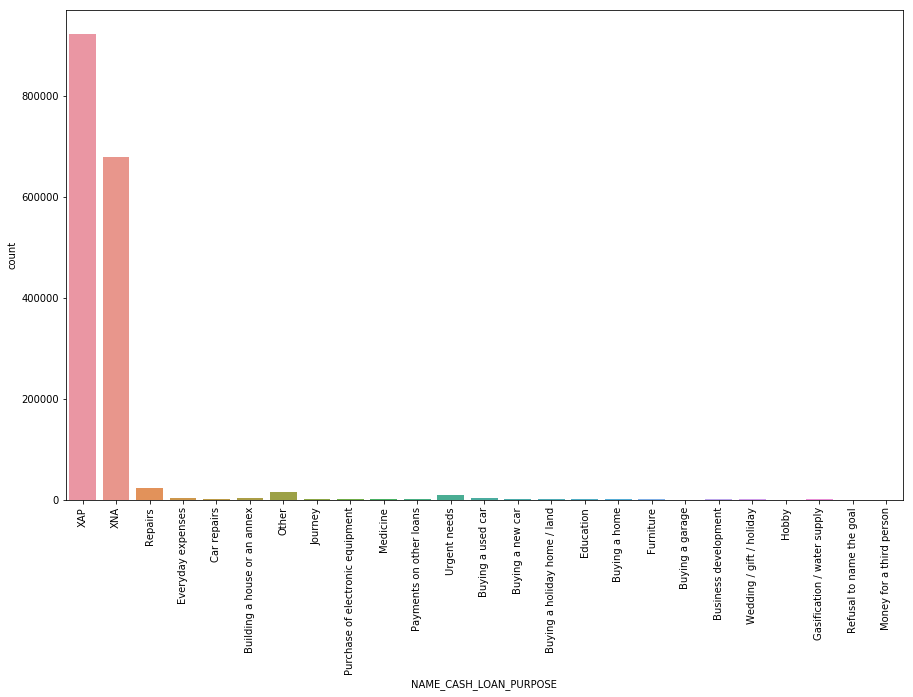

In [98]:
plt.figure(figsize=(15,9))
sns.countplot(x='NAME_CASH_LOAN_PURPOSE',data=df_prevs)
plt.xticks(rotation=90)

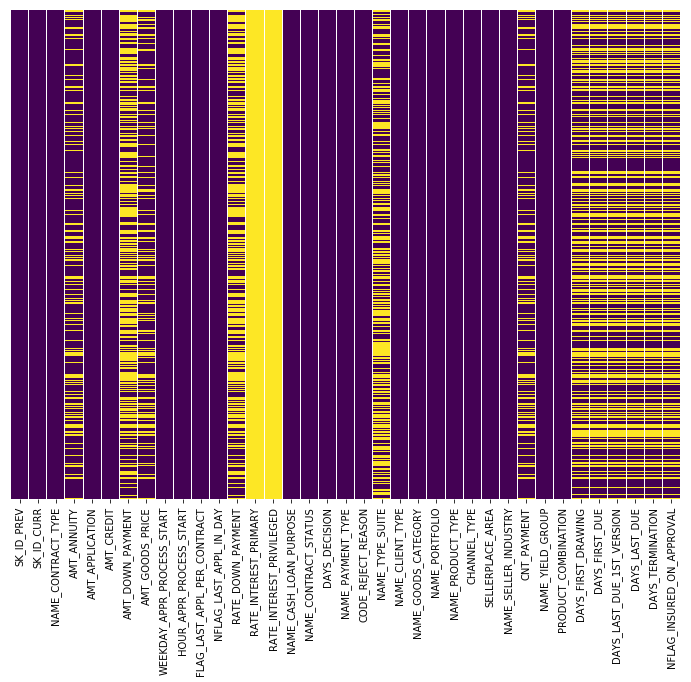

In [99]:
plt.figure(figsize=(12,9))
sns.heatmap(df_prevs.isnull(),yticklabels=False,cbar=False,cmap='viridis')

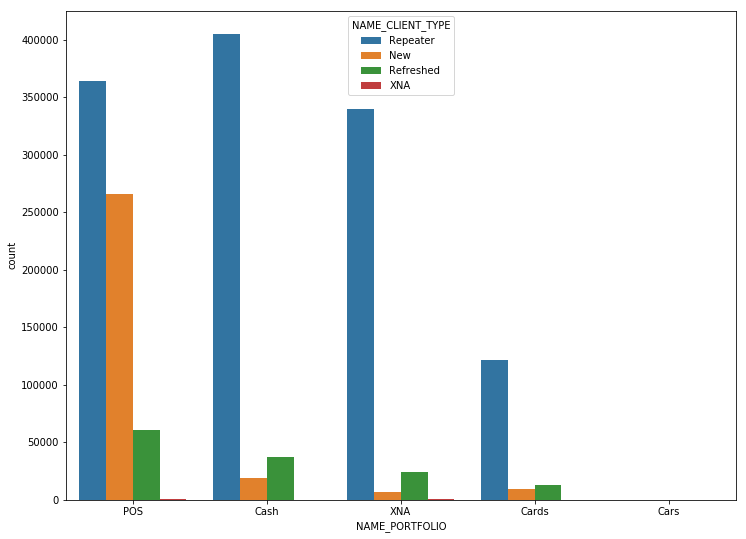

In [99]:
plt.figure(figsize=(12,9))
sns.countplot(x='NAME_PORTFOLIO',data=df_prevs,hue='NAME_CLIENT_TYPE')

In [70]:
df_prevs['NAME_PORTFOLIO']

0            POS
1           Cash
2           Cash
3           Cash
4           Cash
5           Cash
6            XNA
7            XNA
8            XNA
9            XNA
10          Cash
11          Cash
12          Cash
13           POS
14           POS
15           POS
16           POS
17         Cards
18          Cash
19          Cash
20          Cash
21          Cash
22           XNA
23          Cash
24           XNA
25          Cash
26          Cash
27          Cash
28           POS
29           XNA
           ...  
1670184     Cash
1670185     Cash
1670186      XNA
1670187      XNA
1670188     Cash
1670189     Cash
1670190      XNA
1670191    Cards
1670192    Cards
1670193      XNA
1670194     Cash
1670195      POS
1670196      XNA
1670197      POS
1670198      POS
1670199      POS
1670200     Cash
1670201      POS
1670202      POS
1670203      XNA
1670204     Cash
1670205     Cash
1670206     Cash
1670207     Cash
1670208     Cash
1670209      POS
1670210      POS
1670211      P

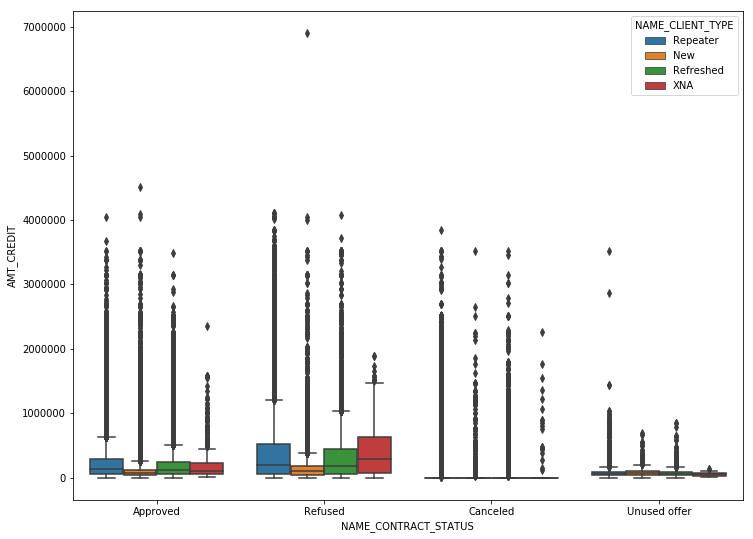

In [94]:
plt.figure(figsize=(12,9))
sns.boxplot(x='NAME_CONTRACT_STATUS',y='AMT_CREDIT',hue='NAME_CLIENT_TYPE',data=df_prevs)

In [71]:
df_prevs['NAME_CONTRACT_STATUS'].head()

0    Approved
1    Approved
2    Approved
3    Approved
4     Refused
Name: NAME_CONTRACT_STATUS, dtype: object

In [72]:
trial1.isnull().sum()

index                         0
SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
OWN_CAR_AGE                   2
FLAG_MOBIL                    0
FLAG_EMP_PHONE                0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_PHONE                    0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
                             ..
DEF_30_C

In [73]:
ownr=own_realty.copy()

In [74]:
ownr.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      24700.5         351000.0   Unaccompanied          Working   
1      35698.5        1129500.0          Family    State servant   
2       6750.0         135000.0   Unaccompanied          Working   
3      29686.5         297000.0   Unaccompanied          Working   
4      21865.5         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE        ...         AMT_REQ_CREDIT_BUREAU_DAY  \
0  Secondary / secondary special        ...                               0.0   
1               Higher education        ...                               0.0   
2  Secondary / secondary special        ...                               0.0   
3  Secondary / secondary special        ...                               NaN   
4  Secondary / secondary special        ...                               0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                        0.0                         1.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   NAME_CONTRACT_TYPE_Revolving loans  CODE_GENDER_M  CODE_GENDER_XNA  \
0                                   0              1                0   
1                                   0              0                0   
2                                   1              1                0   
3                                   0              0                0   
4                                   0              1                0   

   FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  
0               0                  1  
1               0                  0  
2               1                  1  
3               0                  1  
4               0                  1  

[5 rows x 123 columns]

In [75]:
ownr.fillna(method='pad',inplace=True)

In [76]:
ownr.isnull().sum()

SK_ID_CURR                            0
TARGET                                0
CNT_CHILDREN                          0
AMT_INCOME_TOTAL                      0
AMT_CREDIT                            0
AMT_ANNUITY                           0
AMT_GOODS_PRICE                       0
NAME_TYPE_SUITE                       0
NAME_INCOME_TYPE                      0
NAME_EDUCATION_TYPE                   0
NAME_FAMILY_STATUS                    0
NAME_HOUSING_TYPE                     0
REGION_POPULATION_RELATIVE            0
DAYS_BIRTH                            0
DAYS_EMPLOYED                         0
DAYS_REGISTRATION                     0
DAYS_ID_PUBLISH                       0
OWN_CAR_AGE                           2
FLAG_MOBIL                            0
FLAG_EMP_PHONE                        0
FLAG_WORK_PHONE                       0
FLAG_CONT_MOBILE                      0
FLAG_PHONE                            0
FLAG_EMAIL                            0
OCCUPATION_TYPE                       0


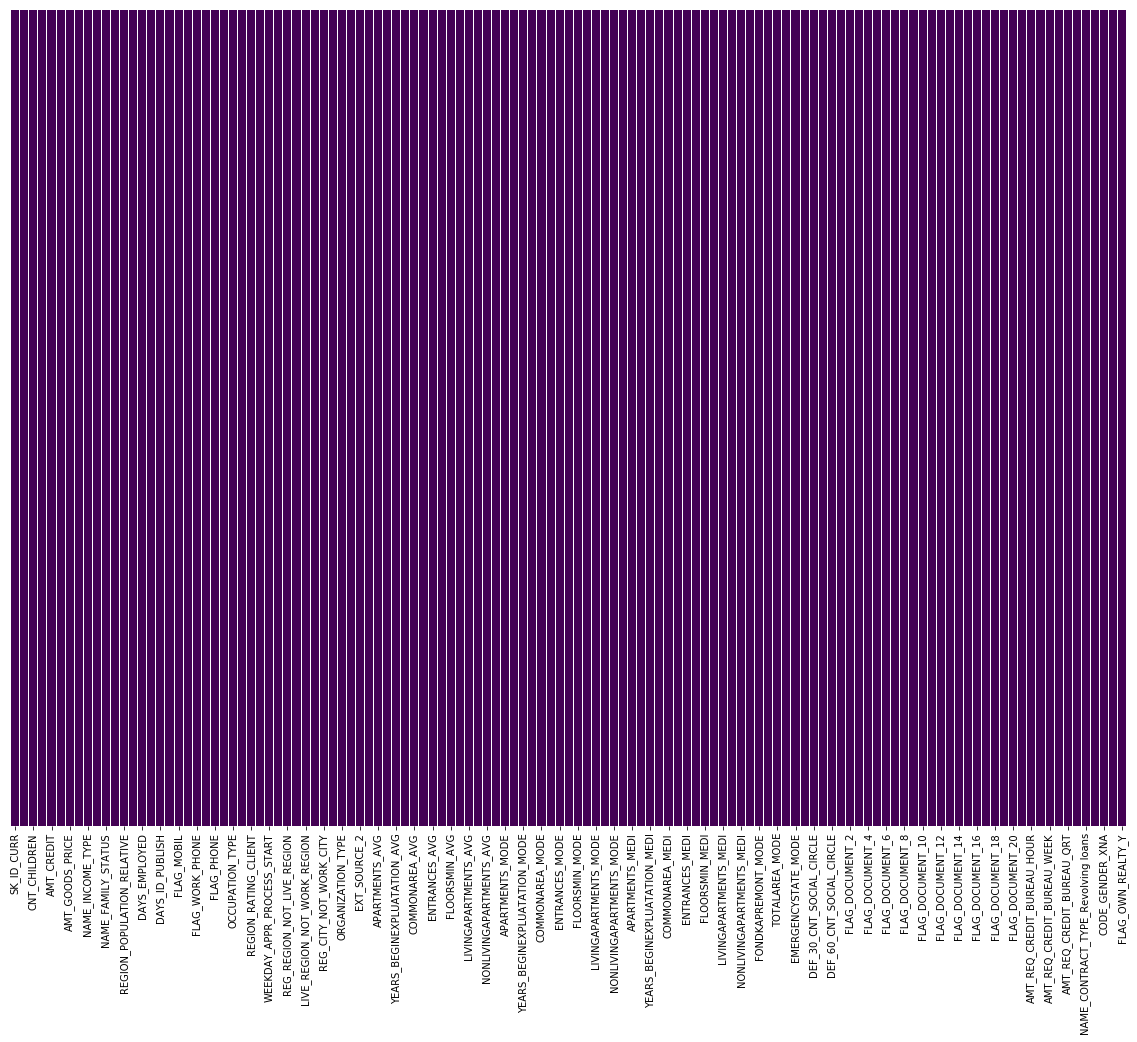

In [121]:
plt.figure(figsize=(20,15))
sns.heatmap(ownr.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [77]:
ownr.fillna(method='bfill',inplace=True)

In [78]:
X = own_realty.drop(['TARGET'],axis = 1)
y = trial1['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [79]:
ownr.select_dtypes('float')

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             202500.000    406597.5      24700.5         351000.0   
1             270000.000   1293502.5      35698.5        1129500.0   
2              67500.000    135000.0       6750.0         135000.0   
3             135000.000    312682.5      29686.5         297000.0   
4             121500.000    513000.0      21865.5         513000.0   
5              99000.000    490495.5      27517.5         454500.0   
6             171000.000   1560726.0      41301.0        1395000.0   
7             360000.000   1530000.0      42075.0        1530000.0   
8             112500.000   1019610.0      33826.5         913500.0   
9             135000.000    405000.0      20250.0         405000.0   
10            112500.000    652500.0      21177.0         652500.0   
11             38419.155    148365.0      10678.5         135000.0   
12             67500.000     80865.0       5881.5          67500.0   
13            225000.000    918468.0      28966.5         697500.0   
14            189000.000    773680.5      32778.0         679500.0   
15            157500.000    299772.0      20160.0         247500.0   
16            108000.000    509602.5      26149.5         387000.0   
17             81000.000    270000.0      13500.0         270000.0   
18            112500.000    157500.0       7875.0         157500.0   
19             90000.000    544491.0      17563.5         454500.0   
20            135000.000    427500.0      21375.0         427500.0   
21            202500.000   1132573.5      37561.5         927000.0   
22            450000.000    497520.0      32521.5         450000.0   
23             83250.000    239850.0      23850.0         225000.0   
24            135000.000    247500.0      12703.5         247500.0   
25             90000.000    225000.0      11074.5         225000.0   
26            112500.000    979992.0      27076.5         702000.0   
27            112500.000    327024.0      23827.5         270000.0   
28            270000.000    790830.0      57676.5         675000.0   
29             90000.000    180000.0       9000.0         180000.0   
...                  ...         ...          ...              ...   
307481        225000.000    297000.0      19975.5         297000.0   
307482        225000.000    500566.5      34969.5         472500.0   
307483         99000.000    247275.0      16479.0         225000.0   
307484        540000.000    545040.0      35617.5         450000.0   
307485        270000.000    180000.0       9000.0         180000.0   
307486        292500.000    355536.0      18283.5         270000.0   
307487        117000.000   1071909.0      31473.0         936000.0   
307488        157500.000    135000.0      13351.5         135000.0   
307489        225000.000    521280.0      23089.5         450000.0   
307490         81000.000    135000.0       9148.5         135000.0   
307491         90000.000   1078200.0      31522.5         900000.0   
307492        585000.000   1575000.0      43443.0        1575000.0   
307493        135000.000    946764.0      37678.5         765000.0   
307494        270000.000    479700.0      46858.5         450000.0   
307495        180000.000    808650.0      23773.5         675000.0   
307496        360000.000    337500.0      16875.0         337500.0   
307497        180000.000    270126.0      12028.5         193500.0   
307498        198000.000   1312110.0      52168.5        1125000.0   
307499         81000.000    225000.0      12694.5         225000.0   
307500        261000.000   1303812.0      35982.0        1138500.0   
307501         81000.000    269550.0      11871.0         225000.0   
307502         94500.000    225000.0      10620.0         225000.0   
307503        112500.000    345510.0      17770.5         247500.0   
307504        153000.000    331920.0      16096.5         225000.0   
307505        112500.000    225000.0      22050.0         225000.0   
307506        1575

In [80]:
ownr_fl = ownr.select_dtypes('float')
ownr_int= ownr.select_dtypes('integer')

In [81]:
hell = pd.concat([ownr_int,ownr_fl],axis=1)

In [82]:
X = hell.drop(['TARGET'],axis = 1)
y = hell['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [83]:
ownr_int['TARGET']

0         1
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        1
27        0
28        0
29        0
         ..
307481    1
307482    0
307483    0
307484    0
307485    0
307486    0
307487    0
307488    0
307489    1
307490    0
307491    0
307492    0
307493    0
307494    0
307495    0
307496    0
307497    0
307498    0
307499    0
307500    0
307501    0
307502    0
307503    0
307504    0
307505    0
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dtree = DecisionTreeClassifier()

In [86]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [87]:
pred_dtree = dtree.predict(X_test)


In [88]:
from sklearn.metrics import classification_report,confusion_matrix

In [89]:
print(classification_report(y_test,pred_dtree))
print(confusion_matrix(y_test,pred_dtree))

             precision    recall  f1-score   support

          0       0.93      0.91      0.92     84891
          1       0.13      0.15      0.14      7363

avg / total       0.86      0.85      0.86     92254

[[77199  7692]
 [ 6227  1136]]


In [90]:
hell.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  DAYS_BIRTH  DAYS_EMPLOYED  \
0      100002       1             0       -9461           -637   
1      100003       0             0      -16765          -1188   
2      100004       0             0      -19046           -225   
3      100006       0             0      -19005          -3039   
4      100007       0             0      -19932          -3038   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE             ...              DEF_30_CNT_SOCIAL_CIRCLE  \
0                 1             ...                                   2.0   
1                 1             ...                                   0.0   
2                 1             ...                                   0.0   
3                 1             ...                                   0.0   
4                 1             ...                                   0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
1                       1.0                       0.0                  -828.0   
2                       0.0                       0.0                  -815.0   
3                       2.0                       0.0                  -617.0   
4                       0.0                       0.0                 -1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         0.0  
4                        0.0                         0.0  

[5 rows x 111 columns]

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scalar = StandardScaler()

In [96]:
scalar.fit(hell.drop('TARGET',axis=1)) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [97]:
scaled = scalar.transform(hell.drop('TARGET',axis=1))

In [98]:
df_trasformed = pd.DataFrame(scaled,columns=hell.columns[:-1])
df_trasformed.head()

SK_ID_CURR    TARGET  CNT_CHILDREN  DAYS_BIRTH  DAYS_EMPLOYED  \
0   -1.733423 -0.577538      1.506880   -0.456215       0.579154   
1   -1.733413 -0.577538     -0.166821   -0.460115       1.790855   
2   -1.733403 -0.577538     -0.689509   -0.453299       0.306869   
3   -1.733384 -0.577538     -0.680114   -0.473217       0.369143   
4   -1.733374 -0.577538     -0.892535   -0.473210      -0.307263   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0         0.001803    0.468697       -0.499013         0.043245   
1         0.001803    0.468697       -0.499013         0.043245   
2         0.001803    0.468697        2.003956         0.043245   
3         0.001803    0.468697       -0.499013         0.043245   
4         0.001803    0.468697       -0.499013         0.043245   

   FLAG_CONT_MOBILE            ...              OBS_30_CNT_SOCIAL_CIRCLE  \
0          1.599337            ...                              4.155400   
1          1.599337            ...                             -0.321079   
2          1.599337            ...                             -0.321079   
3         -0.625259            ...                             -0.321079   
4         -0.625259            ...                             -0.321079   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                  0.249979                  5.241242   
1                 -0.170294                 -0.276147   
2                 -0.590567                 -0.276147   
3                  0.249979                 -0.276147   
4                 -0.590567                 -0.276147   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                 -0.206987                -0.07691   
1                  0.163111                -0.07691   
2                  0.178834                -0.07691   
3                  0.418310                -0.07691   
4                 -0.173122                -0.07691   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                   -0.062587                  -0.168789   
1                   -0.062587                  -0.168789   
2                   -0.062587                  -0.168789   
3                   -0.062587                  -0.168789   
4                   -0.062587                  -0.168789   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                   -0.292743                  -0.343738   
1                   -0.292743                  -0.343738   
2                   -0.292743                  -0.343738   
3                   -0.292743                  -0.343738   
4                   -0.292743                  -0.343738   

   AMT_REQ_CREDIT_BUREAU_QRT  
0                  -0.481015  
1                  -1.015704  
2                  -1.015704  
3                  -1.015704  
4                  -1.015704  

[5 rows x 110 columns]

In [99]:
##tts
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(scaled,hell['TARGET'],
                                                    test_size=0.30)

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn = KNeighborsClassifier(n_neighbors=1)

In [107]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [ ]:
pred_knn = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [262]:
rfc = RandomForestClassifier(n_estimators=10)

In [104]:
X = hell.drop(['TARGET'],axis = 1)
y = hell['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [105]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [106]:
pred_rfc = rfc.predict(X_test)

In [107]:
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

[[84743   148]
 [ 7308    55]]
             precision    recall  f1-score   support

          0       0.92      1.00      0.96     84891
          1       0.27      0.01      0.01      7363

avg / total       0.87      0.92      0.88     92254



In [108]:
dummies = pd.get_dummies(data=hell)

In [109]:
dummies.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  DAYS_BIRTH  DAYS_EMPLOYED  \
0      100002       1             0       -9461           -637   
1      100003       0             0      -16765          -1188   
2      100004       0             0      -19046           -225   
3      100006       0             0      -19005          -3039   
4      100007       0             0      -19932          -3038   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE             ...              DEF_30_CNT_SOCIAL_CIRCLE  \
0                 1             ...                                   2.0   
1                 1             ...                                   0.0   
2                 1             ...                                   0.0   
3                 1             ...                                   0.0   
4                 1             ...                                   0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
1                       1.0                       0.0                  -828.0   
2                       0.0                       0.0                  -815.0   
3                       2.0                       0.0                  -617.0   
4                       0.0                       0.0                 -1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         0.0  
4                        0.0                         0.0  

[5 rows x 111 columns]

In [110]:
dummies['CODE_GENDER_M'].head()

0    1
1    0
2    1
3    0
4    1
Name: CODE_GENDER_M, dtype: uint8

In [111]:
dummies.corr()

SK_ID_CURR    TARGET  CNT_CHILDREN  DAYS_BIRTH  \
SK_ID_CURR                      1.000000 -0.002108     -0.001129   -0.001500   
TARGET                         -0.002108  1.000000      0.019187    0.078239   
CNT_CHILDREN                   -0.001129  0.019187      1.000000    0.330938   
DAYS_BIRTH                     -0.001500  0.078239      0.330938    1.000000   
DAYS_EMPLOYED                   0.001366 -0.044932     -0.239818   -0.615864   
DAYS_ID_PUBLISH                -0.000384  0.051457     -0.028019    0.272691   
FLAG_MOBIL                      0.002804  0.000534      0.001041   -0.003084   
FLAG_EMP_PHONE                 -0.001337  0.045982      0.240714    0.619888   
FLAG_WORK_PHONE                -0.000415  0.028524      0.055630    0.172457   
FLAG_CONT_MOBILE                0.002815  0.000370     -0.000794   -0.014985   
FLAG_PHONE                      0.002753 -0.023806     -0.029906   -0.042402   
FLAG_EMAIL                      0.000281 -0.001758      0.022619    0.088208   
REGION_RATING_CLIENT           -0.001075  0.058899      0.025423    0.009361   
REGION_RATING_CLIENT_W_CITY    -0.001138  0.060893      0.024781    0.008073   
HOUR_APPR_PROCESS_START         0.000350 -0.024166     -0.007292    0.091064   
REG_REGION_NOT_LIVE_REGION     -0.000283  0.005576     -0.013319    0.065486   
REG_REGION_NOT_WORK_REGION      0.001097  0.006942      0.008185    0.095819   
LIVE_REGION_NOT_WORK_REGION     0.002903  0.002819      0.014835    0.069567   
REG_CITY_NOT_LIVE_CITY         -0.001885  0.044395      0.020072    0.180382   
REG_CITY_NOT_WORK_CITY         -0.001582  0.050994      0.070650    0.242401   
LIVE_CITY_NOT_WORK_CITY         0.000067  0.032518      0.069957    0.158882   
FLAG_DOCUMENT_2                 0.000700  0.005417      0.001786   -0.001191   
FLAG_DOCUMENT_3                -0.003411  0.044346      0.056837    0.109666   
FLAG_DOCUMENT_4                -0.004139 -0.002672     -0.003709   -0.002789   
FLAG_DOCUMENT_5                -0.001097 -0.000316     -0.016737    0.016774   
FLAG_DOCUMENT_6                 0.002121 -0.028602     -0.157024   -0.407160   
FLAG_DOCUMENT_7                -0.002694 -0.001520     -0.001498    0.001469   
FLAG_DOCUMENT_8                 0.001809 -0.008040      0.051697    0.113243   
FLAG_DOCUMENT_9                 0.001505 -0.004352     -0.001997    0.018213   
FLAG_DOCUMENT_10               -0.000815 -0.001414     -0.002756   -0.000168   
...                                  ...       ...           ...         ...   
LIVINGAPARTMENTS_MODE           0.004671 -0.007780     -0.003020    0.003872   
LIVINGAREA_MODE                 0.003289 -0.015047     -0.006134   -0.000246   
NONLIVINGAPARTMENTS_MODE       -0.002640 -0.002153     -0.000729   -0.000731   
NONLIVINGAREA_MODE              0.002958 -0.005420     -0.000381    0.004285   
APARTMENTS_MEDI                 0.003417 -0.013727     -0.008492    0.002828   
BASEMENTAREA_MEDI              -0.002106 -0.008701     -0.003492   -0.001918   
YEARS_BEGINEXPLUATATION_MEDI    0.002162 -0.003505      0.002238    0.000367   
YEARS_BUILD_MEDI                0.009653 -0.009517      0.010299    0.005520   
COMMONAREA_MEDI                -0.002644 -0.008894      0.001671    0.001651   
ELEVATORS_MEDI                  0.007274 -0.015197     -0.005055    0.001065   
ENTRANCES_MEDI                 -0.001611 -0.008551     -0.006634   -0.005887   
FLOORSMAX_MEDI                  0.006377 -0.019965     -0.005125    0.000881   
FLOORSMIN_MEDI                  0.004115 -0.009438     -0.002171   -0.000022   
LANDAREA_MEDI                   0.004821 -0.005434     -0.000408    0.003896   
LIVINGAPARTMENTS_MEDI           0.003916 -0.008283     -0.003022    0.003222   
LIVINGAREA_MEDI                 0.003187 -0.015906     -0.006319    0.000231   
NONLIVINGAPARTMENTS_MEDI       -0.003992 -0.002496     -0.000256   -0.000856   
NONLIVINGAREA_MEDI              0.003690 -0.006118     -0.000683    0.004535   
TOTALAREA_MODE                

In [114]:
dummies.corr()['TARGET'].sort_values(ascending = True)

EXT_SOURCE_2                         -0.160207
EXT_SOURCE_3                         -0.140847
EXT_SOURCE_1                         -0.065894
DAYS_EMPLOYED                        -0.044932
AMT_GOODS_PRICE                      -0.039679
REGION_POPULATION_RELATIVE           -0.037227
NAME_CONTRACT_TYPE_Revolving loans   -0.030896
AMT_CREDIT                           -0.030369
FLAG_DOCUMENT_6                      -0.028602
HOUR_APPR_PROCESS_START              -0.024166
FLAG_PHONE                           -0.023806
FLAG_OWN_CAR_Y                       -0.021851
FLOORSMAX_AVG                        -0.020112
FLOORSMAX_MEDI                       -0.019965
FLOORSMAX_MODE                       -0.019666
TOTALAREA_MODE                       -0.016507
LIVINGAREA_AVG                       -0.015999
LIVINGAREA_MEDI                      -0.015906
ELEVATORS_AVG                        -0.015314
ELEVATORS_MEDI                       -0.015197
LIVINGAREA_MODE                      -0.015047
ELEVATORS_MOD

In [115]:
dummies.corr()['TARGET'].sort_values()

EXT_SOURCE_2                         -0.160207
EXT_SOURCE_3                         -0.140847
EXT_SOURCE_1                         -0.065894
DAYS_EMPLOYED                        -0.044932
AMT_GOODS_PRICE                      -0.039679
REGION_POPULATION_RELATIVE           -0.037227
NAME_CONTRACT_TYPE_Revolving loans   -0.030896
AMT_CREDIT                           -0.030369
FLAG_DOCUMENT_6                      -0.028602
HOUR_APPR_PROCESS_START              -0.024166
FLAG_PHONE                           -0.023806
FLAG_OWN_CAR_Y                       -0.021851
FLOORSMAX_AVG                        -0.020112
FLOORSMAX_MEDI                       -0.019965
FLOORSMAX_MODE                       -0.019666
TOTALAREA_MODE                       -0.016507
LIVINGAREA_AVG                       -0.015999
LIVINGAREA_MEDI                      -0.015906
ELEVATORS_AVG                        -0.015314
ELEVATORS_MEDI                       -0.015197
LIVINGAREA_MODE                      -0.015047
ELEVATORS_MOD

In [116]:
ext_data = dummies[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.065894     -0.160207     -0.140847    0.078239
EXT_SOURCE_1 -0.065894      1.000000      0.090655      0.075903   -0.237569
EXT_SOURCE_2 -0.160207      0.090655      1.000000      0.086348   -0.091801
EXT_SOURCE_3 -0.140847      0.075903      0.086348      1.000000   -0.163500
DAYS_BIRTH    0.078239     -0.237569     -0.091801     -0.163500    1.000000

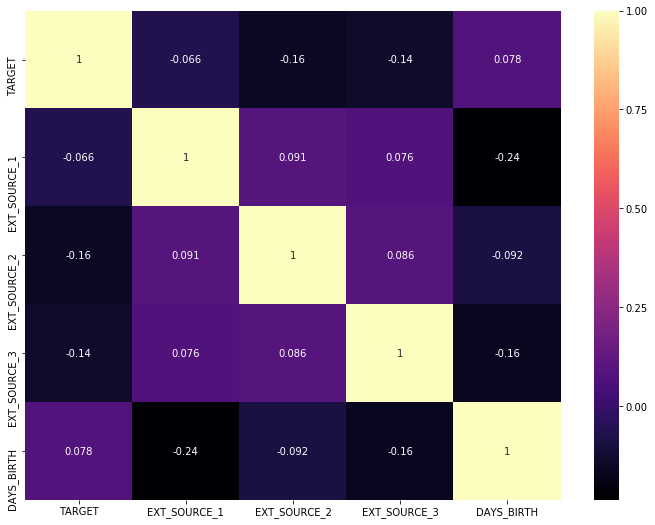

In [135]:
plt.figure(figsize=(12,9))
sns.heatmap(data=ext_data_corrs,cmap='magma',annot=True)

In [117]:
poly_feat = dummies[['EXT_SOURCE_2','EXT_SOURCE_3','EXT_SOURCE_1','DAYS_EMPLOYED']]

In [118]:
poly_feat.head()

EXT_SOURCE_2  EXT_SOURCE_3  EXT_SOURCE_1  DAYS_EMPLOYED
0      0.262949      0.139376      0.083037           -637
1      0.622246      0.139376      0.311267          -1188
2      0.555912      0.729567      0.311267           -225
3      0.650442      0.729567      0.311267          -3039
4      0.322738      0.729567      0.311267          -3038

In [119]:
poly_features_test = df_test_df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]


In [120]:
poly_features_test.head()

EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
0      0.752614      0.789654      0.159520      -19241
1      0.564990      0.291656      0.432962      -18064
2           NaN      0.699787      0.610991      -20038
3      0.525734      0.509677      0.612704      -13976
4      0.202145      0.425687           NaN      -13040

In [121]:
from sklearn.preprocessing import Imputer

In [122]:
impute = Imputer(strategy='median')

In [167]:
poly_features = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = df_test_df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 4)

In [168]:
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 70)


In [169]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [171]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                  -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3     -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3                -0.176428
EXT_SOURCE_1 EXT_SOURCE_2^2 EXT_SOURCE_3   -0.174534
EXT_SOURCE_2 EXT_SOURCE_3^2                -0.172282
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3^2   -0.170938
EXT_SOURCE_1 EXT_SOURCE_2                  -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                  -0.164065
EXT_SOURCE_2^2 EXT_SOURCE_3^2              -0.162923
EXT_SOURCE_2^3 EXT_SOURCE_3                -0.161994
Name: TARGET, dtype: float64
EXT_SOURCE_2^2 EXT_SOURCE_3 DAYS_BIRTH               0.168159
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.174173
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH                 0.181283
TARGET                                               1.000000
1                                                         NaN
Name: TARGET, dtype: float64


In [159]:
poly_corrs.head()

EXT_SOURCE_2 EXT_SOURCE_3                  -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3     -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3                -0.176428
EXT_SOURCE_1 EXT_SOURCE_2^2 EXT_SOURCE_3   -0.174534
EXT_SOURCE_2 EXT_SOURCE_3^2                -0.172282
Name: TARGET, dtype: float64

In [160]:
poly_features.head()

1  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH  EXT_SOURCE_1^2  \
0  1.0      0.083037      0.262949      0.139376     -9461.0        0.006895   
1  1.0      0.311267      0.622246      0.535276    -16765.0        0.096887   
2  1.0      0.505998      0.555912      0.729567    -19046.0        0.256034   
3  1.0      0.505998      0.650442      0.535276    -19005.0        0.256034   
4  1.0      0.505998      0.322738      0.535276    -19932.0        0.256034   

   EXT_SOURCE_1 EXT_SOURCE_2  EXT_SOURCE_1 EXT_SOURCE_3  \
0                   0.021834                   0.011573   
1                   0.193685                   0.166614   
2                   0.281290                   0.369159   
3                   0.329122                   0.270849   
4                   0.163305                   0.270849   

   EXT_SOURCE_1 DAYS_BIRTH  EXT_SOURCE_2^2   ...    \
0              -785.612748        0.069142   ...     
1             -5218.396475        0.387190   ...     
2             -9637.236584        0.309038   ...     
3             -9616.490669        0.423074   ...     
4            -10085.550751        0.104160   ...     

   EXT_SOURCE_2 EXT_SOURCE_3^3  EXT_SOURCE_2 EXT_SOURCE_3^2 DAYS_BIRTH  \
0                     0.000712                              -48.326185   
1                     0.095432                            -2988.969365   
2                     0.215874                            -5635.596478   
3                     0.099757                            -3541.866544   
4                     0.049498                            -1843.135727   

   EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH^2  EXT_SOURCE_2 DAYS_BIRTH^3  \
0                            3.280441e+06              -2.226804e+11   
1                            9.361535e+07              -2.932058e+12   
2                            1.471224e+08              -3.840763e+12   
3                            1.257541e+08              -4.464903e+12   
4                            6.863256e+07              -2.555660e+12   

   EXT_SOURCE_3^4  EXT_SOURCE_3^3 DAYS_BIRTH  EXT_SOURCE_3^2 DAYS_BIRTH^2  \
0        0.000377                 -25.615272                 1.738796e+06   
1        0.082094               -2571.209606                 8.053099e+07   
2        0.283309               -7396.031846                 1.930801e+08   
3        0.082094               -2914.753269                 1.034884e+08   
4        0.082094               -3056.925134                 1.138303e+08   

   EXT_SOURCE_3 DAYS_BIRTH^3  DAYS_BIRTH^4  TARGET  
0              -1.180316e+11  8.012133e+15       1  
1              -2.522253e+12  7.899766e+16       0  
2              -5.040532e+12  1.315876e+17       0  
3              -3.674359e+12  1.304582e+17       0  
4              -4.238680e+12  1.578351e+17       0  

[5 rows x 71 columns]

In [129]:
hell.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  DAYS_BIRTH  DAYS_EMPLOYED  \
0      100002       1             0       -9461           -637   
1      100003       0             0      -16765          -1188   
2      100004       0             0      -19046           -225   
3      100006       0             0      -19005          -3039   
4      100007       0             0      -19932          -3038   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE             ...              DEF_30_CNT_SOCIAL_CIRCLE  \
0                 1             ...                                   2.0   
1                 1             ...                                   0.0   
2                 1             ...                                   0.0   
3                 1             ...                                   0.0   
4                 1             ...                                   0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
1                       1.0                       0.0                  -828.0   
2                       0.0                       0.0                  -815.0   
3                       2.0                       0.0                  -617.0   
4                       0.0                       0.0                 -1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         0.0  
4                        0.0                         0.0  

[5 rows x 111 columns]

In [161]:
poly_corrs

EXT_SOURCE_2 EXT_SOURCE_3                           -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3              -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3                         -0.176428
EXT_SOURCE_1 EXT_SOURCE_2^2 EXT_SOURCE_3            -0.174534
EXT_SOURCE_2 EXT_SOURCE_3^2                         -0.172282
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3^2            -0.170938
EXT_SOURCE_1 EXT_SOURCE_2                           -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                           -0.164065
EXT_SOURCE_2^2 EXT_SOURCE_3^2                       -0.162923
EXT_SOURCE_2^3 EXT_SOURCE_3                         -0.161994
EXT_SOURCE_1^2 EXT_SOURCE_2 EXT_SOURCE_3            -0.160677
EXT_SOURCE_2                                        -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2                         -0.156867
EXT_SOURCE_3                                        -0.155892
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH^2              -0.154886
EXT_SOURCE_2 EXT_SOURCE_3^3                         -0.151463
EXT_SOUR

In [162]:
new_dummies = pd.get_dummies(data=df)

In [163]:
new_dummies.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   

   DAYS_EMPLOYED           ...             HOUSETYPE_MODE_terraced house  \
0           -637           ...                                         0   
1          -1188           ...                                         0   
2           -225           ...                                         0   
3          -3039           ...                                         0   
4          -3038           ...                                         0   

   WALLSMATERIAL_MODE_Block  WALLSMATERIAL_MODE_Mixed  \
0                         0                         0   
1                         1                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   WALLSMATERIAL_MODE_Panel  WALLSMATERIAL_MODE_Stone, brick  \
0                         0                                1   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   WALLSMATERIAL_MODE_Wooden  EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  
0                          0                       1                        0  
1                          0                       1                        0  
2                          0                       0                        0  
3                          0                       0                        0  
4                          0                       0                        0  

[5 rows x 246 columns]

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
sc_X = StandardScaler()

In [164]:
new_dummies = pd.merge(left=new_dummies,right=poly_corrs,on='DAYS_BIRTH')

ValueError: can not merge DataFrame with instance of type <class 'pandas.core.series.Series'>

In [145]:
poly_features['SK_ID_CURR'] = df['SK_ID_CURR']
app_train_poly = df.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

In [146]:
app_train_poly.head()

SK_ID_CURR  TARGET_x NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002         1         Cash loans           M            N   
1      100003         0         Cash loans           F            N   
2      100004         0    Revolving loans           M            Y   
3      100006         0         Cash loans           F            N   
4      100007         0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

     ...     EXT_SOURCE_2^2 EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH  \
0    ...                        0.009637               -654.152107   
1    ...                        0.053965              -6491.237078   
2    ...                        0.225464              -5885.942404   
3    ...                        0.308661              -8040.528832   
4    ...                        0.075992              -2076.117157   

  EXT_SOURCE_2 EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH  \
0                    0.005108                          -346.733022   
1                    0.012088                         -1453.961228   
2                    0.295894                         -7724.580288   
3                    0.346209                         -9018.643943   
4                    0.171783                         -4693.170861   

  EXT_SOURCE_2 DAYS_BIRTH^2 EXT_SOURCE_3^3  EXT_SOURCE_3^2 DAYS_BIRTH  \
0              2.353667e+07       0.002707                -183.785678   
1              1.748916e+08       0.002707                -325.670319   
2              2.016572e+08       0.388325              -10137.567875   
3              2.349331e+08       0.388325              -10115.744905   
4              1.282190e+08       0.388325              -10609.156930   

   EXT_SOURCE_3 DAYS_BIRTH^2  DAYS_BIRTH^3  TARGET_y  
0               1.247560e+07 -8.468590e+11         1  
1               3.917368e+07 -4.712058e+12         0  
2               2.646504e+08 -6.908939e+12         0  
3               2.635122e+08 -6.864416e+12         0  
4               2.898456e+08 -7.918677e+12         0  

[5 rows x 158 columns]

In [151]:
 df_test_df['SK_ID_CURR']

0        100001
1        100005
2        100013
3        100028
4        100038
5        100042
6        100057
7        100065
8        100066
9        100067
10       100074
11       100090
12       100091
13       100092
14       100106
15       100107
16       100109
17       100117
18       100128
19       100141
20       100150
21       100168
22       100169
23       100170
24       100171
25       100172
26       100184
27       100187
28       100212
29       100222
          ...  
48714    455963
48715    455965
48716    456007
48717    456008
48718    456009
48719    456010
48720    456011
48721    456013
48722    456028
48723    456058
48724    456111
48725    456114
48726    456115
48727    456116
48728    456119
48729    456120
48730    456122
48731    456123
48732    456166
48733    456167
48734    456168
48735    456169
48736    456170
48737    456189
48738    456202
48739    456221
48740    456222
48741    456223
48742    456224
48743    456250
Name: SK_ID_CURR, Length

In [165]:
poly_features_test

array([[ 1.00000000e+00,  7.52614491e-01,  7.89654351e-01, ...,
         9.42069751e+06, -1.13630995e+12,  1.37059947e+17],
       [ 1.00000000e+00,  5.64990202e-01,  2.91655532e-01, ...,
         6.11683469e+07, -2.55206200e+12,  1.06476974e+17],
       [ 1.00000000e+00,  5.05997931e-01,  6.99786830e-01, ...,
         1.49892132e+08, -4.91584480e+12,  1.61219470e+17],
       ...,
       [ 1.00000000e+00,  7.33503500e-01,  6.32769551e-01, ...,
         2.04056433e+07, -1.14517111e+12,  6.42673627e+16],
       [ 1.00000000e+00,  3.73090081e-01,  4.45700983e-01, ...,
         6.91780156e+07, -1.62275331e+12,  3.80659704e+16],
       [ 1.00000000e+00,  5.05997931e-01,  4.56540667e-01, ...,
         1.44364320e+07, -7.40670764e+11,  3.80006071e+16]])

In [172]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = df['SK_ID_CURR']
app_train_poly = df.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = df_test_df['SK_ID_CURR']
app_test_poly = df_test_df.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 191)
Testing data with polynomial features shape:   (48744, 191)


In [173]:
app_train_poly.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002         Cash loans           M            N               Y   
1      100003         Cash loans           F            N               N   
2      100004    Revolving loans           M            Y               Y   
3      100006         Cash loans           F            N               Y   
4      100007         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

       ...      EXT_SOURCE_2^2 DAYS_BIRTH^2 EXT_SOURCE_2 EXT_SOURCE_3^3  \
0      ...                     6.188933e+06                    0.000712   
1      ...                     1.088256e+08                    0.095432   
2      ...                     1.121037e+08                    0.215874   
3      ...                     1.528103e+08                    0.099757   
4      ...                     4.138117e+07                    0.049498   

  EXT_SOURCE_2 EXT_SOURCE_3^2 DAYS_BIRTH  \
0                             -48.326185   
1                           -2988.969365   
2                           -5635.596478   
3                           -3541.866544   
4                           -1843.135727   

  EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH^2 EXT_SOURCE_2 DAYS_BIRTH^3  \
0                           3.280441e+06             -2.226804e+11   
1                           9.361535e+07             -2.932058e+12   
2                           1.471224e+08             -3.840763e+12   
3                           1.257541e+08             -4.464903e+12   
4                           6.863256e+07             -2.555660e+12   

   EXT_SOURCE_3^4  EXT_SOURCE_3^3 DAYS_BIRTH  EXT_SOURCE_3^2 DAYS_BIRTH^2  \
0        0.000377                 -25.615272                 1.738796e+06   
1        0.082094               -2571.209606                 8.053099e+07   
2        0.283309               -7396.031846                 1.930801e+08   
3        0.082094               -2914.753269                 1.034884e+08   
4        0.082094               -3056.925134                 1.138303e+08   

   EXT_SOURCE_3 DAYS_BIRTH^3  DAYS_BIRTH^4  
0              -1.180316e+11  8.012133e+15  
1              -2.522253e+12  7.899766e+16  
2              -5.040532e+12  1.315876e+17  
3              -3.674359e+12  1.304582e+17  
4              -4.238680e+12  1.578351e+17  

[5 rows x 191 columns]

In [174]:
new_dummies_train = pd.get_dummies(data=app_train_poly)

In [175]:
new_dummies_train.head()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100002             0          202500.0    406597.5      24700.5   
1      100003             0          270000.0   1293502.5      35698.5   
2      100004             0           67500.0    135000.0       6750.0   
3      100006             0          135000.0    312682.5      29686.5   
4      100007             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH_x  DAYS_EMPLOYED  \
0         351000.0                    0.018801         -9461           -637   
1        1129500.0                    0.003541        -16765          -1188   
2         135000.0                    0.010032        -19046           -225   
3         297000.0                    0.008019        -19005          -3039   
4         513000.0                    0.028663        -19932          -3038   

   DAYS_REGISTRATION           ...             HOUSETYPE_MODE_terraced house  \
0            -3648.0           ...                                         0   
1            -1186.0           ...                                         0   
2            -4260.0           ...                                         0   
3            -9833.0           ...                                         0   
4            -4311.0           ...                                         0   

   WALLSMATERIAL_MODE_Block  WALLSMATERIAL_MODE_Mixed  \
0                         0                         0   
1                         1                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   WALLSMATERIAL_MODE_Panel  WALLSMATERIAL_MODE_Stone, brick  \
0                         0                                1   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   WALLSMATERIAL_MODE_Wooden  EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  
0                          0                       1                        0  
1                          0                       1                        0  
2                          0                       0                        0  
3                          0                       0                        0  
4                          0                       0                        0  

[5 rows x 315 columns]

In [176]:
new_dummies_train['EXT_SOURCE_1 EXT_SOURCE_2'].head()

0    0.021834
1    0.193685
2    0.281290
3    0.329122
4    0.163305
Name: EXT_SOURCE_1 EXT_SOURCE_2, dtype: float64

In [177]:
new_dummies_test = pd.get_dummies(data=app_test_poly)

In [178]:
new_dummies_test.head()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100001             0          135000.0    568800.0      20560.5   
1      100005             0           99000.0    222768.0      17370.0   
2      100013             0          202500.0    663264.0      69777.0   
3      100028             2          315000.0   1575000.0      49018.5   
4      100038             1          180000.0    625500.0      32067.0   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH_x  DAYS_EMPLOYED  \
0         450000.0                    0.018850        -19241          -2329   
1         180000.0                    0.035792        -18064          -4469   
2         630000.0                    0.019101        -20038          -4458   
3        1575000.0                    0.026392        -13976          -1866   
4         625500.0                    0.010032        -13040          -2191   

   DAYS_REGISTRATION           ...             HOUSETYPE_MODE_terraced house  \
0            -5170.0           ...                                         0   
1            -9118.0           ...                                         0   
2            -2175.0           ...                                         0   
3            -2000.0           ...                                         0   
4            -4000.0           ...                                         0   

   WALLSMATERIAL_MODE_Block  WALLSMATERIAL_MODE_Mixed  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   WALLSMATERIAL_MODE_Panel  WALLSMATERIAL_MODE_Stone, brick  \
0                         0                                1   
1                         0                                0   
2                         0                                0   
3                         1                                0   
4                         0                                0   

   WALLSMATERIAL_MODE_Wooden  EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  
0                          0                       1                        0  
1                          0                       0                        0  
2                          0                       0                        0  
3                          0                       1                        0  
4                          0                       0                        0  

[5 rows x 312 columns]

In [179]:
X_dummies_train = new_dummies_train.drop['TARGET']

TypeError: 'method' object is not subscriptable

In [185]:
new_dummies_train = new_dummies_train.reset_index()

In [191]:
X_dummies_train = new_dummies_train

In [198]:
X_dummies_test = df['TARGET']

In [188]:
new_dummies_train.head()

level_0  index  SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        0      0      100002             0          202500.0    406597.5   
1        1      1      100003             0          270000.0   1293502.5   
2        2      2      100004             0           67500.0    135000.0   
3        3      3      100006             0          135000.0    312682.5   
4        4      4      100007             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH_x  \
0      24700.5         351000.0                    0.018801         -9461   
1      35698.5        1129500.0                    0.003541        -16765   
2       6750.0         135000.0                    0.010032        -19046   
3      29686.5         297000.0                    0.008019        -19005   
4      21865.5         513000.0                    0.028663        -19932   

            ...             HOUSETYPE_MODE_terraced house  \
0           ...                                         0   
1           ...                                         0   
2           ...                                         0   
3           ...                                         0   
4           ...                                         0   

   WALLSMATERIAL_MODE_Block  WALLSMATERIAL_MODE_Mixed  \
0                         0                         0   
1                         1                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   WALLSMATERIAL_MODE_Panel  WALLSMATERIAL_MODE_Stone, brick  \
0                         0                                1   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   WALLSMATERIAL_MODE_Wooden  EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  
0                          0                       1                        0  
1                          0                       1                        0  
2                          0                       0                        0  
3                          0                       0                        0  
4                          0                       0                        0  

[5 rows x 317 columns]

In [190]:
new_dummies_train

level_0   index  SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0             0       0      100002             0        202500.000   
1             1       1      100003             0        270000.000   
2             2       2      100004             0         67500.000   
3             3       3      100006             0        135000.000   
4             4       4      100007             0        121500.000   
5             5       5      100008             0         99000.000   
6             6       6      100009             1        171000.000   
7             7       7      100010             0        360000.000   
8             8       8      100011             0        112500.000   
9             9       9      100012             0        135000.000   
10           10      10      100014             1        112500.000   
11           11      11      100015             0         38419.155   
12           12      12      100016             0         67500.000   
13           13      13      100017             1        225000.000   
14           14      14      100018             0        189000.000   
15           15      15      100019             0        157500.000   
16           16      16      100020             0        108000.000   
17           17      17      100021             1         81000.000   
18           18      18      100022             0        112500.000   
19           19      19      100023             1         90000.000   
20           20      20      100024             0        135000.000   
21           21      21      100025             1        202500.000   
22           22      22      100026             1        450000.000   
23           23      23      100027             0         83250.000   
24           24      24      100029             2        135000.000   
25           25      25      100030             0         90000.000   
26           26      26      100031             0        112500.000   
27           27      27      100032             1        112500.000   
28           28      28      100033             0        270000.000   
29           29      29      100034             0         90000.000   
...         ...     ...         ...           ...               ...   
307481   307481  307481      456225             0        225000.000   
307482   307482  307482      456226             0        225000.000   
307483   307483  307483      456227             0         99000.000   
307484   307484  307484      456228             0        540000.000   
307485   307485  307485      456229             1        270000.000   
307486   307486  307486      456230             1        292500.000   
307487   307487  307487      456231             0        117000.000   
307488   307488  307488      456232             0        157500.000   
307489   307489  307489      456233             0        225000.000   
307490   307490  307490      456234             0         81000.000   
307491   307491  307491      456235             2         90000.000   
307492   307492  307492      456236             0        585000.000   
307493   307493  307493      456237             0        135000.000   
307494   307494  307494      456238             1        270000.000   
307495   307495  307495      456239             0        180000.000   
307496   307496  307496      456240             0        360000.000   
307497   307497  307497      456241             0        180000.000   
307498   307498  307498      456242             0        198000.000   
307499   307499  307499      456243             0         81000.000   
307500   307500  307500      456244             0        261000.000   
307501   307501  307501      456245             3         81000.000   
307502   307502  307502      456246             1         94500.000   
307503   307503  307503      456247             0        112500.000   
307504   307504  307504      456248             0        153000.000   
307505   307505  307505      456

AttributeError: 'function' object has no attribute 'shape'

In [203]:
from sklearn.preprocessing import Imputer

In [226]:
imputer = Imputer(strategy='mean')

In [227]:
imputed = imputer.fit(new_dummies_train)

level_0   index  SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0             0       0      100002             0        202500.000   
1             1       1      100003             0        270000.000   
2             2       2      100004             0         67500.000   
3             3       3      100006             0        135000.000   
4             4       4      100007             0        121500.000   
5             5       5      100008             0         99000.000   
6             6       6      100009             1        171000.000   
7             7       7      100010             0        360000.000   
8             8       8      100011             0        112500.000   
9             9       9      100012             0        135000.000   
10           10      10      100014             1        112500.000   
11           11      11      100015             0         38419.155   
12           12      12      100016             0         67500.000   
13           13      13      100017             1        225000.000   
14           14      14      100018             0        189000.000   
15           15      15      100019             0        157500.000   
16           16      16      100020             0        108000.000   
17           17      17      100021             1         81000.000   
18           18      18      100022             0        112500.000   
19           19      19      100023             1         90000.000   
20           20      20      100024             0        135000.000   
21           21      21      100025             1        202500.000   
22           22      22      100026             1        450000.000   
23           23      23      100027             0         83250.000   
24           24      24      100029             2        135000.000   
25           25      25      100030             0         90000.000   
26           26      26      100031             0        112500.000   
27           27      27      100032             1        112500.000   
28           28      28      100033             0        270000.000   
29           29      29      100034             0         90000.000   
...         ...     ...         ...           ...               ...   
307481   307481  307481      456225             0        225000.000   
307482   307482  307482      456226             0        225000.000   
307483   307483  307483      456227             0         99000.000   
307484   307484  307484      456228             0        540000.000   
307485   307485  307485      456229             1        270000.000   
307486   307486  307486      456230             1        292500.000   
307487   307487  307487      456231             0        117000.000   
307488   307488  307488      456232             0        157500.000   
307489   307489  307489      456233             0        225000.000   
307490   307490  307490      456234             0         81000.000   
307491   307491  307491      456235             2         90000.000   
307492   307492  307492      456236             0        585000.000   
307493   307493  307493      456237             0        135000.000   
307494   307494  307494      456238             1        270000.000   
307495   307495  307495      456239             0        180000.000   
307496   307496  307496      456240             0        360000.000   
307497   307497  307497      456241             0        180000.000   
307498   307498  307498      456242             0        198000.000   
307499   307499  307499      456243             0         81000.000   
307500   307500  307500      456244             0        261000.000   
307501   307501  307501      456245             3         81000.000   
307502   307502  307502      456246             1         94500.000   
307503   307503  307503      456247             0        112500.000   
307504   307504  307504      456248             0        153000.000   
307505   307505  307505      456

In [220]:
from sklearn.preprocessing import StandardScaler

In [221]:
sc_X = StandardScaler()

In [222]:
X_dummies_train.head()

level_0  index  SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        0      0      100002             0          202500.0    406597.5   
1        1      1      100003             0          270000.0   1293502.5   
2        2      2      100004             0           67500.0    135000.0   
3        3      3      100006             0          135000.0    312682.5   
4        4      4      100007             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH_x  \
0      24700.5         351000.0                    0.018801         -9461   
1      35698.5        1129500.0                    0.003541        -16765   
2       6750.0         135000.0                    0.010032        -19046   
3      29686.5         297000.0                    0.008019        -19005   
4      21865.5         513000.0                    0.028663        -19932   

            ...             HOUSETYPE_MODE_terraced house  \
0           ...                                         0   
1           ...                                         0   
2           ...                                         0   
3           ...                                         0   
4           ...                                         0   

   WALLSMATERIAL_MODE_Block  WALLSMATERIAL_MODE_Mixed  \
0                         0                         0   
1                         1                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   WALLSMATERIAL_MODE_Panel  WALLSMATERIAL_MODE_Stone, brick  \
0                         0                                1   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   WALLSMATERIAL_MODE_Wooden  EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  
0                          0                       1                        0  
1                          0                       1                        0  
2                          0                       0                        0  
3                          0                       0                        0  
4                          0                       0                        0  

[5 rows x 317 columns]

In [224]:
X_dummies_train.size

97480987

In [228]:
imputed

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [229]:
new_dummies_train.isna

<bound method DataFrame.isna of         level_0   index  SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0             0       0      100002             0        202500.000   
1             1       1      100003             0        270000.000   
2             2       2      100004             0         67500.000   
3             3       3      100006             0        135000.000   
4             4       4      100007             0        121500.000   
5             5       5      100008             0         99000.000   
6             6       6      100009             1        171000.000   
7             7       7      100010             0        360000.000   
8             8       8      100011             0        112500.000   
9             9       9      100012             0        135000.000   
10           10      10      100014             1        112500.000   
11           11      11      100015             0         38419.155   
12           12      12      100016          

In [230]:
new_dummies_train.head()

level_0  index  SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        0      0      100002             0          202500.0    406597.5   
1        1      1      100003             0          270000.0   1293502.5   
2        2      2      100004             0           67500.0    135000.0   
3        3      3      100006             0          135000.0    312682.5   
4        4      4      100007             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH_x  \
0      24700.5         351000.0                    0.018801         -9461   
1      35698.5        1129500.0                    0.003541        -16765   
2       6750.0         135000.0                    0.010032        -19046   
3      29686.5         297000.0                    0.008019        -19005   
4      21865.5         513000.0                    0.028663        -19932   

            ...             HOUSETYPE_MODE_terraced house  \
0           ...                                         0   
1           ...                                         0   
2           ...                                         0   
3           ...                                         0   
4           ...                                         0   

   WALLSMATERIAL_MODE_Block  WALLSMATERIAL_MODE_Mixed  \
0                         0                         0   
1                         1                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   WALLSMATERIAL_MODE_Panel  WALLSMATERIAL_MODE_Stone, brick  \
0                         0                                1   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   WALLSMATERIAL_MODE_Wooden  EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  
0                          0                       1                        0  
1                          0                       1                        0  
2                          0                       0                        0  
3                          0                       0                        0  
4                          0                       0                        0  

[5 rows x 317 columns]

In [231]:
new_dummies_train = imputed.transform(new_dummies_train)

In [233]:
X_dummies_train = new_dummies_train

In [234]:
X_dummies_test = df['TARGET']

In [235]:
from sklearn.preprocessing import StandardScaler

In [236]:
sc_X = StandardScaler()

In [240]:
X_dummies_train = sc_X.fit_transform(X_dummies_train)

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies_train, y, test_size=0.33, random_state=101)

In [256]:
from sklearn.ensemble import RandomForestClassifier

In [263]:
rfc = RandomForestClassifier(n_estimators = 500, random_state = 50, verbose = 1, n_jobs = -1)

In [264]:
rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   45.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [265]:
pred_rfc = rfc.predict(X_test)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.1s finished


In [266]:
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

[[93163   126]
 [ 8082   108]]
             precision    recall  f1-score   support

          0       0.92      1.00      0.96     93289
          1       0.46      0.01      0.03      8190

avg / total       0.88      0.92      0.88    101479



In [267]:
rfc_100 = RandomForestClassifier(n_estimators = 500, random_state = 50, verbose = 1, n_jobs = -1)

In [268]:
rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   45.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [269]:
pred_rfc = rfc.predict(X_test)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.2s finished


In [270]:
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

[[93163   126]
 [ 8082   108]]
             precision    recall  f1-score   support

          0       0.92      1.00      0.96     93289
          1       0.46      0.01      0.03      8190

avg / total       0.88      0.92      0.88    101479

